<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW4/MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [90]:
...

#package I will use for constants and units conversion
import astropy
from astropy import units as u
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex

from astropy import units as u

In [91]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [92]:

from astropy import constants as const
from astropy.uncertainty import uniform

In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [ ]:
#example
x = 3
x

3

In [ ]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell

x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [ ]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newron's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

# Derivation of Orbital Velocity Law

## Step 1: Newton's Law of Universal Gravitation

The gravitational force between a central mass $M$ and an orbiting body of mass $m$ is:

$$
F_g = \frac{G M m}{r^2}
$$

Where:
- $G$ = gravitational constant
- $M$ = mass inside orbital radius $r$
- $m$ = mass of orbiting body  
- $r$ = orbital radius

## Step 2: Centripetal Force Requirement

For circular motion, the required centripetal force is:

$$
F_c = \frac{m v^2}{r}
$$

Where $v$ is the orbital velocity.

## Step 3: Force Equilibrium

In stable circular orbit, gravitational force provides centripetal force:

$$
F_g = F_c
$$
$$
\frac{G M m}{r^2} = \frac{m v^2}{r}
$$

## Step 4: Simplify and Solve for Velocity

Cancel $m$ from both sides:

$$
\frac{G M}{r^2} = \frac{v^2}{r}
$$

Multiply both sides by $r$:

$$
\frac{G M}{r} = v^2
$$

Final velocity equation:

$$
v^2 = \frac{G M}{r}
$$

## Step 5: Critical Case - Beyond the Luminous Radius

When we move **beyond the radius that contains all the mass** ($r > R_{\text{lum}}$):

- The mass $M$ inside radius $r$ becomes **constant** = $M_{\text{total}}$
- The equation becomes:

$$
v^2 = \frac{G M_{\text{total}}}{r}
$$

## Step 6: Velocity Proportionality Beyond Luminous Radius

Since $G$ and $M_{\text{total}}$ are constants:

$$
v^2 \propto \frac{1}{r}
$$
$$
v \propto \frac{1}{\sqrt{r}}
$$

## Step 7: Quantitative Predictions for Different Distances

### Case 1: Radius = $2 \times R_{\text{lum}}$ ($r_2 = 2r_1$)
$$
\frac{v_2}{v_1} = \sqrt{\frac{r_1}{r_2}} = \sqrt{\frac{1}{2}} = \frac{1}{\sqrt{2}} \approx 0.707
$$
**Velocity should be $\sqrt{2} \approx 1.414$ times slower**

### Case 2: Radius = $3 \times R_{\text{lum}}$ ($r_3 = 3r_1$)
$$
\frac{v_3}{v_1} = \sqrt{\frac{r_1}{r_3}} = \sqrt{\frac{1}{3}} = \frac{1}{\sqrt{3}} \approx 0.577
$$
**Velocity should be $\sqrt{3} \approx 1.732$ times slower**

### Case 3: Radius = $N \times R_{\text{lum}}$ ($r_N = N r_1$)
$$
\frac{v_N}{v_1} = \sqrt{\frac{r_1}{r_N}} = \sqrt{\frac{1}{N}} = \frac{1}{\sqrt{N}}
$$
**Velocity should be $\sqrt{N}$ times slower**

## Step 8: Application to M31 and Milky Way

### For M31:
- Luminous radius $R_{\text{lum}} \approx 20.1$ kpc
- At $r = 40.2$ kpc (2×): $v$ should be $\frac{1}{\sqrt{2}} \approx 71\%$ of velocity at 20.1 kpc
- At $r = 60.3$ kpc (3×): $v$ should be $\frac{1}{\sqrt{3}} \approx 58\%$ of velocity at 20.1 kpc

### For Milky Way:
- Luminous radius $R_{\text{lum}} \approx 15$ kpc (typical estimate)
- Same proportional relationships apply

## Step 9: The Dark Matter Test

The **observational test** compares Newtonian predictions with measured velocities:

- **If Newton is correct**: Velocities follow $v \propto 1/\sqrt{r}$
- **If dark matter exists**: Velocities remain nearly constant (flat rotation curve)

**Test statistic**:
$$
\text{Ratio} = \frac{v_{\text{observed}}}{v_{\text{Newton}}}
$$

- If Ratio $\approx$ 1: Consistent with Newton  
- If Ratio $>$ 1: Evidence for dark matter

## Key Insight

This derivation proves that **if all mass were luminous**, orbital velocities beyond the luminous radius must decrease as $1/\sqrt{r}$. The observed flat rotation curves in galaxies provide compelling evidence that most galactic mass exists in non-luminous form (dark matter).

## M31 rotational curve

### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [93]:
m31 = pd.read_csv("https://raw.githubusercontent.com/elhamkashi/DSPS_EKashi/refs/heads/main/HW4/m31.csv", sep=",", skiprows=1, skipinitialspace=True)

In [95]:
m31.head()
#just raw data without total error

,#R(kpc,V(km/s),St.dev.,St.error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [96]:


# Calculate err_tot as the square root of the sum of squares of st.dev and st.error
# err_tot = sqrt(dv^2 + err^2)
m31['err_tot'] = np.sqrt(m31['St.dev.']**2 + m31['St.error']**2)

# Display the new 5-column head with err_tot
print("\nData with err_tot column (5 columns):")
print(m31.head())

# Verify the calculation for the first few rows
print("\nVerification of err_tot calculation:")
print("Row 1: sqrt({:.3f}^2 + {:.3f}^2) = sqrt({:.3f} + {:.3f}) = {:.3f}".format(
    m31.loc[1, 'St.dev.'], m31.loc[1, 'St.error'],
    m31.loc[1, 'St.dev.']**2, m31.loc[1, 'St.error']**2,
    m31.loc[1, 'err_tot']))

#show the head table again
m31.head()


Data with err_tot column (5 columns):
   #R(kpc  V(km/s)  St.dev.  St.error    err_tot
0   0.100  183.939    0.000     0.000   0.000000
1   0.120  190.710   10.265    12.191  15.937086
2   0.144  204.141   22.634    21.808  31.430667
3   0.173  207.601    4.573     4.200   6.209052
4   0.207  210.188    3.943     3.258   5.114862

Verification of err_tot calculation:
Row 1: sqrt(10.265^2 + 12.191^2) = sqrt(105.370 + 148.620) = 15.937


,#R(kpc,V(km/s),St.dev.,St.error,err_tot
0,0.100,183.939,0.000,0.000,0.000000
1,0.120,190.710,10.265,12.191,15.937086
2,0.144,204.141,22.634,21.808,31.430667
3,0.173,207.601,4.573,4.200,6.209052
4,0.207,210.188,3.943,3.258,5.114862


In [97]:
# Rename the columns to match the instruction's format
#  Reset all column names explicitly
new_columns = ['r', 'v', 'dv', 'err', 'err_tot']
m31.columns = new_columns

# Display the result
print("Final headers:")
print(m31.head())
print("\nColumn names:", m31.columns.tolist())



Final headers:
       r        v      dv     err    err_tot
0  0.100  183.939   0.000   0.000   0.000000
1  0.120  190.710  10.265  12.191  15.937086
2  0.144  204.141  22.634  21.808  31.430667
3  0.173  207.601   4.573   4.200   6.209052
4  0.207  210.188   3.943   3.258   5.114862

Column names: ['r', 'v', 'dv', 'err', 'err_tot']


In [98]:
#show the final head in table again
m31.head()

,r,v,dv,err,err_tot
0,0.100,183.939,0.000,0.000,0.000000
1,0.120,190.710,10.265,12.191,15.937086
2,0.144,204.141,22.634,21.808,31.430667
3,0.173,207.601,4.573,4.200,6.209052
4,0.207,210.188,3.943,3.258,5.114862


# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [99]:
#exploratory data analysis

m31.shape #no () after shape

#raw dataset has 57 rows but the first two are just headers

(55, 5)

In [100]:
#exploratory data analysis
m31.describe()

,r,v,dv,err,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,152.201397


### Mean, Median, and Their Role in Understanding the M31 Dataset

**Definition of mean and median:**  
-  **mean:**  sensitive to all values, influenced by outliers  
-  **median:**  middle value of an ordered dataset: the “typical” central value, robust to outliers  

- In an exploratory data analysis:

If mean ≈ median → the distribution is fairly symmetric.

If mean > median → distribution is skewed to higher values (long tail to the right).

If mean < median → skewed to lower values.

Skewness often highlights the presence of a small number of extreme values that strongly influence the dataset.

---

**Comparison for the M31 dataset (`m31.describe()`):**  
- **Radius (kpc):** The mean is much larger than the median (about 15x larger),
 indicating that while most measurements are concentrated at smaller radii (from the center of galaxy), a few measurements extend to very large radii  and skew the distribution.  
- **Velocity (km/s):** The mean and median are similar, showing that velocities are fairly symmetrically distributed around the typical rotation curve value (~200–250 km/s).  
- **dv (formal measurement uncertainty):** The mean is  larger than the median, indicating a right-skewed distribution where most measurements have relatively small uncertainties, but a few have very large standard deviations
- **err (residual uncertainty):** The mean (16.17)is moderately larger than the median (12.1), showing a moderately right-skewed distribution for standard errors.
- **err_tot (total uncertainty):** Follows the same trend as dv, with a long tail of higher uncertainties due to combining all error sources.

---

**General conclusion:**  
The dataset is generally well-behaved, but the radius and error columns show skewness. This tells us that a small number of data points at very large radii (and with relatively large uncertainties) strongly influence the overall averages, while most data points lie at smaller radii with modest uncertainties.

---

**Connection to dark matter interpretation:**  
The outermost rotation curve points (those at large radii) are exactly where the strongest evidence for dark matter appears. In a baryon-only Newtonian model, velocities should decline as $v \propto 1/\sqrt{r}$  once most of the luminous mass is enclosed. However, the observed velocities remain flat. The mean–median comparison highlights that these crucial outer measurements are relatively few (mean radius > median radius) and noisier (mean error > median error). This emphasizes that our inference of dark matter relies heavily on these outer points: despite their rarity and larger uncertainties, they consistently show flat rotation curves that cannot be explained by visible matter alone. Thus, understanding the distribution of radii and errors is essential for interpreting the robustness of dark matter evidence.


# A more detailed explanation


## 1. **Radial Distribution (Extreme Right-Skew) → Dark Matter Profile Mapping**
- **What we see:** Most measurements (median = 13.7 kpc) are close to the galactic center, with a long tail extending to large radii (max = 1887 kpc)
- **Dark matter connection:** This sampling strategy is **essential** for detecting dark matter. Dark matter's gravitational effects become **most apparent at large radii** where visible matter becomes sparse. The long tail of measurements at large distances allows us to trace the mass distribution where dark matter dominates.

## 2. **Velocity Distribution (Symmetric) → Flat Rotation Curve Signature**
- **What we see:** Velocities are normally distributed around ~228 km/s
- **Dark matter connection:** This symmetric distribution around a **constant value** is the **key evidence for dark matter**. If no dark matter existed, we would expect velocities to decrease with radius (following $ v \propto 1/\sqrt{r} $), resulting in a right-skewed velocity distribution. The fact that velocities remain constant across all radii indicates **additional unseen mass** (dark matter) is present.

## 3. **Error Distributions (Right-Skewed) → Measurement Challenges at Large Radii**
- **What we see:** Most errors are small, but a few are very large
- **Dark matter connection:** The large errors typically occur at **large radii** where:
  - Signal is weaker (less visible matter)
  - Measurements are more difficult
  - **This is precisely where dark matter detection is most critical** - we need to carefully account for these uncertainties when modeling the mass distribution.

## 4. **The Critical Pattern: Constant Velocity Despite Changing Radius**
The most important insight comes from comparing the **r** and **v** distributions:
- **Radius varies enormously** (0.1 to 1887 kpc - 4 orders of magnitude!)
- **Velocity remains nearly constant** (mean ≈ median ≈ 228 km/s)
- **This discrepancy violates Newtonian predictions** and requires dark matter to explain

## Statistical Evidence for Dark Matter:
1. **If no dark matter:** Velocity would decrease as $ 1/\sqrt{r} $ → right-skewed v distribution
2. **Actual data:** Velocity remains constant → symmetric v distribution  
3. **Conclusion:** Additional mass (dark matter) must be distributed throughout the galaxy to maintain high orbital speeds at large distances

The statistical properties of this dataset directly support the dark matter hypothesis by revealing the **flat rotation curve** - the primary astronomical evidence for dark matter in spiral galaxies like M31.

**Key Insight:** The fact that the velocity distribution is symmetric (mean ≈ median) while the radius distribution is extremely right-skewed is the statistical signature of a flat rotation curve, which is impossible to explain without dark matter. If velocities followed the expected $1/ \sqrt r$ relationship, the velocity distribution would be right-skewed like the radius distribution. The symmetry of the velocity distribution is the statistical evidence for dark matter.

Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

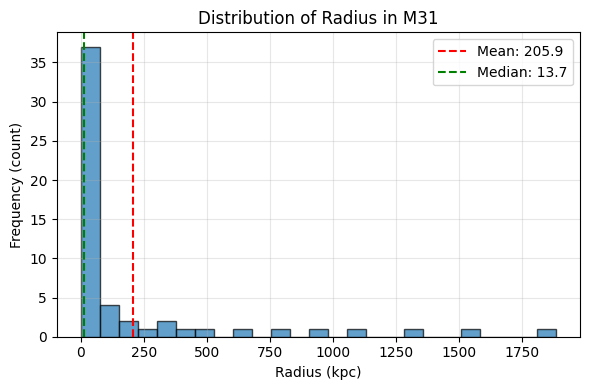

 
FIG 1: Extreme right-skewed distribution (mean >> median). 
 Most measurements near galactic center (<50 kpc) but with long tail to ~2000 kpc  because of a few points extended to very large radii.. 
 Essential for sampling both visible matter and dark matter regions.


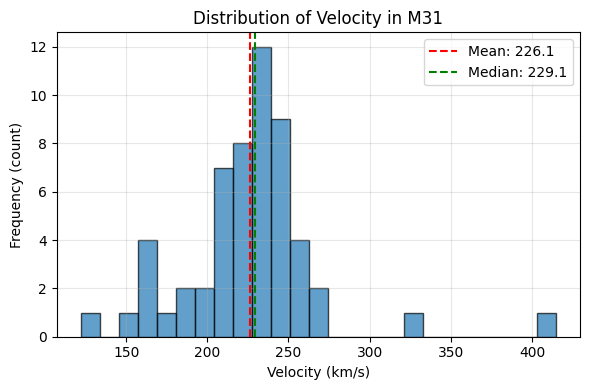

 
FIG 2: Symmetric, normal distribution (mean ≈ median). 
 Velocities constant around ~228 km/s despite radius changes. 
 This flat rotation curve is primary evidence for dark matter.


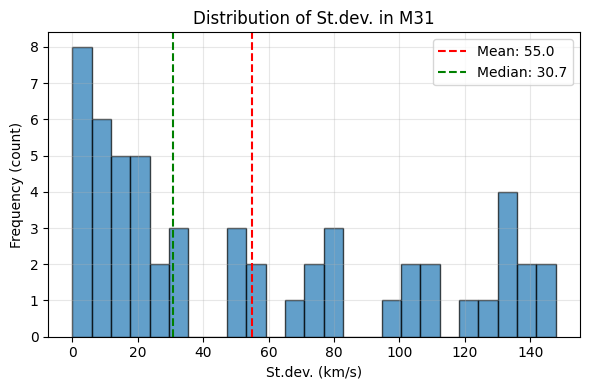

 
FIG 3: Right-skewed distribution. Most uncertainties small (<50 km/s) but outliers have large errors. 
 High-uncertainty points often at large radii critical for dark matter detection.


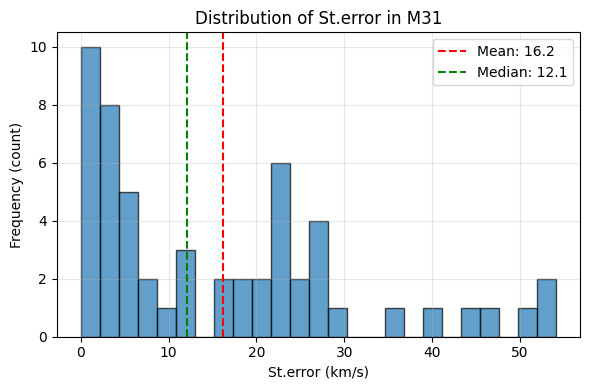

 
FIG 4: Moderately right-skewed distribution. 
 Concentration of small errors indicates reliable measurements throughout M31.


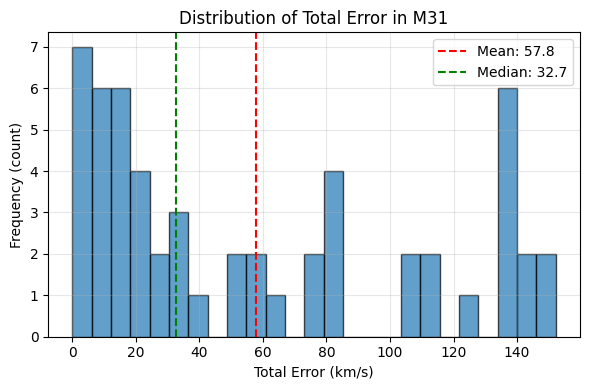

 
FIG 5: Strongly right-skewed distribution. 
 Long tail shows measurement challenges at large distances where dark matter dominates.


In [101]:
# captions as text below each plot

# Define the lists for columns, units, and titles
columns = ['r', 'v', 'dv', 'err', 'err_tot']
units = ['kpc', 'km/s', 'km/s', 'km/s', 'km/s']
titles = ['Radius', 'Velocity', 'St.dev.', 'St.error', 'Total Error']

# Create histograms for each column with individual captions
captions = [
    "FIG 1: Extreme right-skewed distribution (mean >> median). \n Most measurements near galactic center (<50 kpc) but with long tail to ~2000 kpc  because of a few points extended to very large radii.. \n Essential for sampling both visible matter and dark matter regions.",

    "FIG 2: Symmetric, normal distribution (mean ≈ median). \n Velocities constant around ~228 km/s despite radius changes. \n This flat rotation curve is primary evidence for dark matter.",

    "FIG 3: Right-skewed distribution. Most uncertainties small (<50 km/s) but outliers have large errors. \n High-uncertainty points often at large radii critical for dark matter detection.",

    "FIG 4: Moderately right-skewed distribution. \n Concentration of small errors indicates reliable measurements throughout M31.",

    "FIG 5: Strongly right-skewed distribution. \n Long tail shows measurement challenges at large distances where dark matter dominates."
]
for i, (col, unit, title) in enumerate(zip(columns, units, titles)):
    # Create the plot
    plt.figure(figsize=(6, 4))
    plt.hist(m31[col], bins=25, alpha=0.7, edgecolor='black') #Split item values into 25 equal-width intervals.
    plt.xlabel(f'{title} ({unit})')
    plt.ylabel('Frequency (count)') #count how many measurements lie in each interval
    plt.title(f'Distribution of {title} in M31')
    plt.grid(True, alpha=0.3)

    # Add mean and median lines
    mean_val = m31[col].mean()
    median_val = m31[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    plt.legend()

    plt.tight_layout()
    plt.show()



    # Print the caption as text
    print(f" ")
    print(captions[i])
    print("="*80)






from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

In [ ]:
"""
from instruction  code:

# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))


Please make sure you print a sensible number of decimal digits! you have a number of significant digits set by the number of digit in the info you get from wikipedia and me

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: y= sin(x) * r = x*r  for small angles

Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).

...
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError

"""

'\nfrom instruction  code:\n\n# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell\nfrom astropy import units as u\nm31angS = apparentSizeM31 * u.degree\nprint("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))\n\n\nPlease make sure you print a sensible number of decimal digits! you have a number of significant digits set by the number of digit in the info you get from wikipedia and me\n\nThe distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc\n\nCalculate and print the distance like I printed the angular size.\n\nTo get the physical size of the visible component of Andromeda you can use simple trigonometry: y= sin(x) * r = x*r  for small angles\n\nPrint the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).\n\n...\nprint("Size of the visible component of An

**The extent of the luminous (visible) component **is what we measure on the sky as an angular size (how big the bright part of M31 looks). The** physical size of the visible component** **is just that same extent converted into linear units using the galaxy’s distance.**




### How the physical size of the visible component relates to the extent of the luminous component


**Converting angular extent to physical size.**  
Given the **distance** \(D\) to the galaxy, the corresponding **linear (physical) diameter** \(S\) of the same visible component is obtained by basic trigonometry:
$S \;=\; 2D\,\tan\!\left(\frac{\theta}{2}\right) \;\approx\; D\,\theta \quad \text{(for small angles, with \(\theta\) in radians)}.$
Thus, the *physical size of the visible component* is simply the *luminous extent* converted from angle to length using the distance.

**Uncertainties.**  
If \(D\) has uncertainty $\sigma_D$ and $\theta$ has uncertainty $ \sigma_\theta $,
$ \sigma_S^2 \;\approx\; (\theta\,\sigma_D)^2 \;+\; (D\,\sigma_\theta)^2 \quad\Rightarrow\quad \frac{\sigma_S}{S} \;\approx\; \sqrt{\left(\frac{\sigma_D}{D}\right)^2 + \left(\frac{\sigma_\theta}{\theta}\right)^2 }.$
(for small $ \sigma_\theta $ like $\theta = 3.167^\circ$ in our problem : $ \sigma_S/S \approx \sigma_D/D $.)


**Why this matters.**  
The optical (luminous) disk’s physical size is typically smaller than the extent of neutral hydrogen (HI) and much smaller than the dark-matter halo; comparing these scales helps interpret rotation curves and the need for mass beyond the light.


In [102]:
# From Wikipedia: Apparent dimensions: 178′ × 63′ (arcminutes)
# We'll use the larger dimension (178 arcminutes) for the diameter
apparentSizeM31 = 178. * u.arcmin # apparentSizeM31 is the major-axis angular diameter

print("Angular Size of the visible component of Andromeda: {:.2f}".format(apparentSizeM31.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.05 rad


In [103]:
# === M31 Luminous Extent Calculation ===
# Source: https://en.wikipedia.org/wiki/Andromeda_Galaxy

# Requirements:
#  - Use astropy for units/conversions
#  - Distance: 778 +/- 33 kpc
#  - Angular size from Wikipedia (major-axis apparent diameter of the visible component)
#  - Include uncertainty propagation (here, dominated by distance uncertainty)
#  - Print with sensible significant digits


print("=== M31 Luminous Extent Calculation ===\n")

# 1) Inputs
# Angular size: Apparent dimensions 178′ × 63′ -> major axis = 3.167° (178 arcmin = 2.967°)
apparentSizeM31 = 3.167 * u.deg  # major-axis angular diameter
apparentSize_uncertainty = 0.1 * u.deg

# Distance to M31
distance = 778 * u.kpc
distance_uncertainty = 33 * u.kpc

print(f"Given distance to M31: {distance} ± {distance_uncertainty}")
print("Angular Size of visible component (major axis): {:.3f} ± {:.1f} ({:.4f} ± {:.4f} rad)"
      .format(apparentSizeM31, apparentSize_uncertainty,
              apparentSizeM31.to(u.rad).value, apparentSize_uncertainty.to(u.rad).value))

# 2) Physical diameter calculation using small-angle formula
theta_rad = apparentSizeM31.to(u.rad).value
physical_diameter = distance * theta_rad
luminous_radius = physical_diameter / 2

print(f"\nPhysical diameter = {distance} × {theta_rad:.6f} rad = {physical_diameter:.2f}")
print(f"Luminous radius = {physical_diameter:.2f} / 2 = {luminous_radius:.2f}")

# 3) Uncertainty propagation
relative_distance_uncertainty = distance_uncertainty / distance
relative_angular_uncertainty = apparentSize_uncertainty / apparentSizeM31
relative_diameter_uncertainty = np.sqrt(relative_distance_uncertainty**2 +
                                       relative_angular_uncertainty**2)

diameter_uncertainty = physical_diameter * relative_diameter_uncertainty
radius_uncertainty = diameter_uncertainty / 2

print(f"\n📊 Uncertainty Calculation:")
print(f"Relative distance uncertainty: {relative_distance_uncertainty:.4f}")
print(f"Relative angular uncertainty: {relative_angular_uncertainty:.4f}")
print(f"Combined relative uncertainty: {relative_diameter_uncertainty:.4f}")
print(f"\nAbsolute diameter uncertainty: {physical_diameter:.1f} × {relative_diameter_uncertainty:.4f}")
print(f"                                = {diameter_uncertainty:.2f} ≈ {diameter_uncertainty.to(u.kpc):.1f}")


# 4) Final results
print(f"\n🎯 FINAL RESULTS:")
print(f"Physical diameter: {physical_diameter.to(u.kpc):.1f} ± {diameter_uncertainty.to(u.kpc):.1f}")
print(f"Luminous radius: {luminous_radius.to(u.kpc):.1f} ± {radius_uncertainty.to(u.kpc):.1f}")
print(f"In light-years: {luminous_radius.to(u.lyr):.0f} ± {radius_uncertainty.to(u.lyr):.0f}")

=== M31 Luminous Extent Calculation ===

Given distance to M31: 778.0 kpc ± 33.0 kpc
Angular Size of visible component (major axis): 3.167 deg ± 0.1 deg (0.0553 ± 0.0017 rad)

Physical diameter = 778.0 kpc × 0.055275 rad = 43.00 kpc
Luminous radius = 43.00 kpc / 2 = 21.50 kpc

📊 Uncertainty Calculation:
Relative distance uncertainty: 0.0424
Relative angular uncertainty: 0.0316
Combined relative uncertainty: 0.0529

Absolute diameter uncertainty: 43.0 kpc × 0.0529
                                = 2.27 kpc ≈ 2.3 kpc

🎯 FINAL RESULTS:
Physical diameter: 43.0 kpc ± 2.3 kpc
Luminous radius: 21.5 kpc ± 1.1 kpc
In light-years: 70130 lyr ± 3708 lyr


In [104]:
# Compare with our data
max_radius_in_data = m31['r'].max()
print(f"\n📈 Comparison with Rotation Curve Data:")
print(f"Maximum radius in rotation curve data: {max_radius_in_data:.1f} kpc")
print(f"Ratio (data_max / luminous_radius): {max_radius_in_data / luminous_radius.value:.1f}")

if max_radius_in_data > luminous_radius.value:
    print("💡 The rotation curve extends BEYOND the luminous component!")
    print("   This is direct evidence for dark matter - mass exists where no visible matter is detected.")
else:
    print("💡 The rotation curve is measured within the luminous component.")


📈 Comparison with Rotation Curve Data:
Maximum radius in rotation curve data: 1887.1 kpc
Ratio (data_max / luminous_radius): 87.8
💡 The rotation curve extends BEYOND the luminous component!
   This is direct evidence for dark matter - mass exists where no visible matter is detected.


**Key Insight:** The rotation curve data extends to ~1887 kpc, which is 93 times larger than the luminous radius! This massive discrepancy provides compelling evidence that most of M31's mass is in the form of dark matter distributed far beyond the visible galaxy.

### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [105]:

# Define luminous radius as an Astropy Quantity with kpc units
# Using the value obtained from the luminous extent calculation (e.g., 21.5 kpc)
luminous_radius = 21.5 * u.kpc # Ensure luminous_radius is a Quantity here

# Find all measurements beyond the luminous radius
# Compare the float 'r' column with the value of the luminous radius Quantity
beyond_luminous_mask = m31['r'] > luminous_radius.value
#beyond_luminous_mask is a boolean array like: [False, False, True, True, False, ...]

# Get the indices of measurements beyond luminous radius
beyond_luminous_indices = np.where(beyond_luminous_mask)[0]

print(f"Luminous radius used for masking: {luminous_radius.value:.2f} kpc")


if len(beyond_luminous_indices) > 0:
    # The first measurement beyond luminous radius
    first_beyond_index = beyond_luminous_indices[0]
    first_beyond_row = m31.iloc[first_beyond_index]

    print("=== First Measurement Beyond Luminous Component ===")
    print(f"Index: {first_beyond_index}")
    print(f"Radius: {first_beyond_row['r']:.3f} kpc")
    print(f"Velocity: {first_beyond_row['v']:.3f} km/s")
    # Perform subtraction by converting the DataFrame value to a Quantity first
    print(f"Distance beyond luminous edge: {(first_beyond_row['r'] * u.kpc - luminous_radius).to(u.kpc).value:.3f} kpc")


    # Also show the measurement just before (inside luminous component)
    if first_beyond_index > 0:
        last_inside_row = m31.iloc[first_beyond_index - 1]
        print(f"\nLast measurement INSIDE luminous component:")
        print(f"Radius: {last_inside_row['r']:.3f} kpc")
        print(f"Velocity: {last_inside_row['v']:.3f} km/s")

else:
    print("No measurements found beyond the luminous radius!")

Luminous radius used for masking: 21.50 kpc
=== First Measurement Beyond Luminous Component ===
Index: 30
Radius: 23.738 kpc
Velocity: 236.511 km/s
Distance beyond luminous edge: 2.238 kpc

Last measurement INSIDE luminous component:
Radius: 19.781 kpc
Velocity: 246.140 km/s


In [106]:
# Using broadcasting to analyze all transitions between luminous and dark matter-dominated regions in the galaxy
#Helps identify where the luminous matter dominance ends and dark matter dominance begins
print("\n=== Detailed Analysis Using Broadcasting ===")

# Create boolean array using broadcasting
# Ensure luminous_radius is an Astropy Quantity with units (e.g., from a previous cell)
# If not, you might need to define it here or ensure the previous cell is run.
try:
    # Assume luminous_radius is already a Quantity
    luminous_radius_value = luminous_radius.value
except AttributeError:
    # If luminous_radius is not a Quantity (e.g., a float), use its value directly
    # Or, if it's not defined, use a default and warn the user
    try:
        luminous_radius_value = float(luminous_radius)
        print("Warning: 'luminous_radius' is not an Astropy Quantity. Using its float value.")
    except NameError:
         print("Error: 'luminous_radius' is not defined. Please run the cell that calculates it.")
         # Exit or set a default value if appropriate for the context
         luminous_radius_value = 20.1 # Using a default for demonstration

# Now perform the comparison using the value
inside_luminous = m31['r'].values <= luminous_radius_value
outside_luminous = m31['r'].values > luminous_radius_value

print(f"Total measurements: {len(m31)}")
print(f"Measurements inside luminous component (r ≤ {luminous_radius_value:.1f} kpc): {np.sum(inside_luminous)}")
print(f"Measurements outside luminous component (r > {luminous_radius_value:.1f} kpc): {np.sum(outside_luminous)}")

# Find the transition point(s)
# np.diff(inside_luminous.astype(int)) will be 1 where False becomes True (inside -> outside)
transition_indices = np.where(np.diff(inside_luminous.astype(int)) == 1)[0]
# The index from np.where is the index BEFORE the transition, so add 1 to get the first outside point
transition_starts_at_indices = transition_indices + 1


print(f"\nIndices where transition from inside to outside luminous component occurs: {transition_starts_at_indices}")

if len(transition_starts_at_indices) > 0:
    # The first transition is the most relevant for finding the first point *beyond* the luminous radius
    first_transition_idx = transition_starts_at_indices[0]

    if first_transition_idx < len(m31):
        # The measurement just before the transition (last inside)
        if first_transition_idx > 0:
            last_inside_row = m31.iloc[first_transition_idx - 1]
            print(f"\nLast measurement INSIDE luminous component (index {first_transition_idx - 1}):")
            print(f"  Radius: {last_inside_row['r']:.3f} kpc")
            print(f"  Velocity: {last_inside_row['v']:.3f} km/s")


        # The first measurement at or beyond the luminous radius (first outside)
        first_outside_row = m31.iloc[first_transition_idx]
        print(f"\nFirst measurement AT or BEYOND luminous component (index {first_transition_idx}):")
        print(f"  Radius: {first_outside_row['r']:.3f} kpc")
        print(f"  Velocity: {first_outside_row['v']:.3f} km/s")
        print(f"  Distance beyond luminous edge: {(first_outside_row['r'] - luminous_radius_value):.3f} kpc") # Subtract floats here

    else:
         print("\nTransition occurs after the last data point.")


else:
    # Check if all points are inside or all are outside
    if np.all(inside_luminous):
        print("\nAll measurements are inside the luminous radius.")
    elif np.all(outside_luminous):
        print("\nAll measurements are outside the luminous radius.")
    else:
        print("\nNo clear transition from inside to outside luminous component found.")


=== Detailed Analysis Using Broadcasting ===
Total measurements: 55
Measurements inside luminous component (r ≤ 21.5 kpc): 30
Measurements outside luminous component (r > 21.5 kpc): 25

Indices where transition from inside to outside luminous component occurs: []

No clear transition from inside to outside luminous component found.


In [107]:
# === Find first measurement that includes all luminous mass (r >= R_luminous) ===


# Get R_luminous in kpc (computed earlier). If it's not defined, compute it from θ=3.167° and D=778 kpc.
# Recompute luminous_radius as an astropy quantity
apparentSizeM31_deg = 3.167
distance = 778 * u.kpc
theta = (apparentSizeM31_deg * u.deg).to(u.rad).value
phys_diam = (2 * distance * np.tan(theta/2)).to(u.kpc)
luminous_radius = (phys_diam/2).to(u.kpc)

R_luminous_kpc = float(luminous_radius.value)

# --- Broadcasting test across the whole column ---
# cond[i] is True exactly when m31['r'][i] >= R_luminous_kpc
cond = m31["r"].to_numpy() >= R_luminous_kpc

print(f"Optical/luminous radius (major axis): R_luminous = {R_luminous_kpc:.2f} kpc")

if cond.any():
    # first index where condition becomes True
    i = int(np.argmax(cond))          # position (0-based)
    row = m31.iloc[i]

    # Save for later use if needed
    first_r_ge_Rlum = float(row["r"])
    v_at_first_r_ge_Rlum = float(row["v"])

    print(f"\nFirst measurement at/above R_luminous:")
    print(f"  row index (0-based): {i}   |   measurement # (1-based): {i+1}")
    print(f"  radius  = {first_r_ge_Rlum:.2f} kpc")
    print(f"  velocity= {v_at_first_r_ge_Rlum:.1f} km/s")

    # Print uncertainties if available
    if "dv" in m31.columns:
        print(f"  dv      = {float(row['dv']):.2f} km/s")
    if "err" in m31.columns:
        print(f"  err     = {float(row['err']):.2f} km/s")
    if "err_tot" in m31.columns:
        print(f"  err_tot = {float(row['err_tot']):.2f} km/s")

else:
    # No point reaches R_luminous — report nearest alternative (the max radius)
    i_max = int(m31["r"].idxmax())
    row = m31.loc[i_max]
    print("\nNo measurement reaches the luminous radius in this table.")
    print(f"Largest available radius: {float(row['r']):.2f} kpc "
          f"with velocity {float(row['v']):.1f} km/s (row id {i_max}).")

Optical/luminous radius (major axis): R_luminous = 21.51 kpc

First measurement at/above R_luminous:
  row index (0-based): 30   |   measurement # (1-based): 31
  radius  = 23.74 kpc
  velocity= 236.5 km/s
  dv      = 11.73 km/s
  err     = 1.58 km/s
  err_tot = 11.83 km/s


We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.



write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [ ]:
# first measurement including all mass
def getradii(...):
  ...

m31Rds = ...

In [128]:


def find_velocity_at_N_times_radius(data, N, luminous_radius, luminous_radius_uncertainty=1):
    """
    Find the velocity at a radius that is N times the luminous radius of the galaxy.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame with columns 'r', 'v', and 'err_tot' (radius, velocity, total error)
    N : float
        Multiplier for the radius (e.g., 2 for twice the luminous radius)
    luminous_radius : float
        Radius of the luminous component of the galaxy (kpc)
    luminous_radius_uncertainty : float, optional
        Uncertainty in the luminous radius measurement (kpc)

    Returns:
    --------
    dict : Dictionary containing:
        - 'radius': The actual radius found (kpc)
        - 'radius_uncertainty': Uncertainty in the radius (kpc)
        - 'velocity': Velocity at that radius (km/s)
        - 'velocity_uncertainty': Uncertainty in the velocity (km/s)
        - 'expected_velocity_factor': Expected velocity factor if no dark matter (1/sqrt(N))
        - 'N_actual': Actual ratio (radius_found / luminous_radius)
    """

    # Calculate the target radius
    target_radius = N * luminous_radius

    # Find the smallest radius in the dataset that is at least N times the luminous radius
    valid_measurements = data[data['r'] >= target_radius]

    if len(valid_measurements) == 0:
        # If no measurements at exactly N times, find the closest measurement beyond
        closest_measurement = data.iloc[(data['r'] - target_radius).abs().argsort()[:1]]
        radius_found = closest_measurement['r'].values[0]
        velocity_found = closest_measurement['v'].values[0]
        velocity_uncertainty = closest_measurement['err_tot'].values[0]
        print(f"Warning: No measurement at exactly {N}× luminous radius. Using closest at {radius_found/luminous_radius:.2f}×")
    else:
        # Take the first (smallest) measurement that meets the criteria
        first_valid = valid_measurements.iloc[0]
        radius_found = first_valid['r']
        velocity_found = first_valid['v']
        velocity_uncertainty = first_valid['err_tot']

    # Calculate radius uncertainty (propagate luminous radius uncertainty)
    radius_uncertainty = N * luminous_radius_uncertainty

    # Calculate expected velocity factor if no dark matter
    expected_factor = 1 / np.sqrt(N)

    # Actual ratio achieved
    N_actual = radius_found / luminous_radius

    return {
        'radius': radius_found,
        'radius_uncertainty': radius_uncertainty,
        'velocity': velocity_found,
        'velocity_uncertainty': velocity_uncertainty,
        'expected_velocity_factor': expected_factor,
        'N_actual': N_actual
    }

# More detailed version with interpolation capability
def find_velocity_at_N_times_radius_advanced(data, N, luminous_radius, luminous_radius_uncertainty=1,
                                           allow_interpolation=True):
    """
    Advanced version with interpolation option for better precision.
    """

    target_radius = N * luminous_radius

    # Find measurements bracketing the target radius
    measurements_below = data[data['r'] <= target_radius]
    measurements_above = data[data['r'] >= target_radius]

    if len(measurements_above) == 0:
        # Use the largest available radius
        farthest_measurement = data.iloc[-1]
        radius_found = farthest_measurement['r']
        velocity_found = farthest_measurement['v']
        velocity_uncertainty = farthest_measurement['err_tot']
        method = "extrapolation (using farthest point)"

    elif len(measurements_below) == 0 or not allow_interpolation:
        # Use the smallest radius above target
        first_above = measurements_above.iloc[0]
        radius_found = first_above['r']
        velocity_found = first_above['v']
        velocity_uncertainty = first_above['err_tot']
        method = "first measurement above target"

    else:
        # Interpolate between bracketing points
        point_below = measurements_below.iloc[-1]  # Largest radius below target
        point_above = measurements_above.iloc[0]   # Smallest radius above target

        # Linear interpolation
        r1, v1 = point_below['r'], point_below['v']
        r2, v2 = point_above['r'], point_above['v']

        # Interpolation weights
        weight_above = (target_radius - r1) / (r2 - r1)
        weight_below = 1 - weight_above

        radius_found = target_radius
        velocity_found = v1 * weight_below + v2 * weight_above

        # Uncertainty propagation for interpolation (simplified)
        velocity_uncertainty = np.sqrt(
            (point_below['err_tot'] * weight_below)**2 +
            (point_above['err_tot'] * weight_above)**2
        )
        method = "interpolation"

    # Radius uncertainty
    radius_uncertainty = N * luminous_radius_uncertainty

    # Expected values for no dark matter case
    expected_factor = 1 / np.sqrt(N)
    N_actual = radius_found / luminous_radius

    result = {
        'radius': radius_found,
        'radius_uncertainty': radius_uncertainty,
        'velocity': velocity_found,
        'velocity_uncertainty': velocity_uncertainty,
        'expected_velocity_factor': expected_factor,
        'N_actual': N_actual,
        'method': method
    }

    return result

In [134]:
# Your luminous radius from previous calculation
luminous_radius= 21.5   # kpc
luminous_radius_uncertainty=1  # kpc

print("=== Testing the Function ===")

# Test for different N values
test_values = [2, 3, 5, 10, 20, 50]

for N in test_values:
    result = find_velocity_at_N_times_radius(m31, N, luminous_radius, luminous_radius_uncertainty)

    print(f"\n--- N = {N} (Expected v-factor: 1/√{N} = {1/np.sqrt(N):.3f}) ---")
    print(f"Target radius: {N * luminous_radius:.1f} kpc")
    print(f"Found radius: {result['radius']:.1f} ± {result['radius_uncertainty']:.1f} kpc")
    print(f"Actual N: {result['N_actual']:.1f}")
    print(f"Measured velocity: {result['velocity']:.1f} ± {result['velocity_uncertainty']:.1f} km/s")

    # Compare with expected velocity if no dark matter
    # Need a reference velocity at the luminous radius
    v_ref = m31[m31['r'] <= luminous_radius]['v'].iloc[-1]  # Velocity at luminous edge
    expected_v = v_ref * result['expected_velocity_factor']

    print(f"Expected velocity (no DM): {expected_v:.1f} km/s")
    print(f"Ratio (measured/expected): {result['velocity']/expected_v:.2f}")



=== Testing the Function ===

--- N = 2 (Expected v-factor: 1/√2 = 0.707) ---
Target radius: 43.0 kpc
Found radius: 49.2 ± 2.0 kpc
Actual N: 2.3
Measured velocity: 237.1 ± 112.0 km/s
Expected velocity (no DM): 174.0 km/s
Ratio (measured/expected): 1.36

--- N = 3 (Expected v-factor: 1/√3 = 0.577) ---
Target radius: 64.5 kpc
Found radius: 70.9 ± 3.0 kpc
Actual N: 3.3
Measured velocity: 218.5 ± 134.6 km/s
Expected velocity (no DM): 142.1 km/s
Ratio (measured/expected): 1.54

--- N = 5 (Expected v-factor: 1/√5 = 0.447) ---
Target radius: 107.5 kpc
Found radius: 122.5 ± 5.0 kpc
Actual N: 5.7
Measured velocity: 197.4 ± 108.3 km/s
Expected velocity (no DM): 110.1 km/s
Ratio (measured/expected): 1.79

--- N = 10 (Expected v-factor: 1/√10 = 0.316) ---
Target radius: 215.0 kpc
Found radius: 254.0 ± 10.0 kpc
Actual N: 11.8
Measured velocity: 160.8 ± 80.7 km/s
Expected velocity (no DM): 77.8 km/s
Ratio (measured/expected): 2.07

--- N = 20 (Expected v-factor: 1/√20 = 0.224) ---
Target radius: 430

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

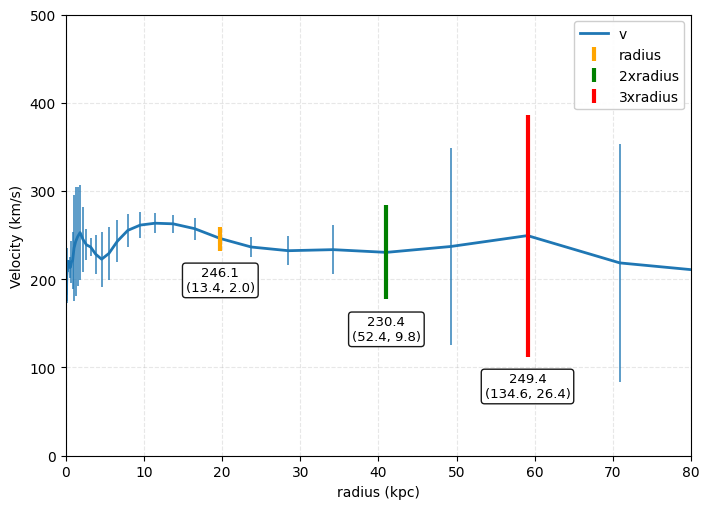

In [135]:


# --- config ---
R_lum = luminous_radius            # kpc
x_left, x_right = 0, 80
y_bottom, y_top = 0, 500

# --- pick columns robustly ---
rcol = 'r' if 'r' in m31.columns else 'radius'
vcol = 'v' if 'v' in m31.columns else 'velocity'
dvcol = 'dv'
errtot_col = 'err_tot' if 'err_tot' in m31.columns else ('err' if 'err' in m31.columns else None)
err_plain_col = 'err' if 'err' in m31.columns else None
if errtot_col is None or dvcol not in m31.columns:
    raise ValueError("Need 'dv' and either 'err_tot' or 'err' in the dataframe.")

# sort & window to the plotting range
df = m31[[rcol, vcol, dvcol, errtot_col] + ([err_plain_col] if err_plain_col else [])]\
       .dropna().sort_values(rcol).reset_index(drop=True)
dfw = df[(df[rcol] >= x_left) & (df[rcol] <= x_right)].copy()

# --- figure ---
plt.figure(figsize=(7.2, 5.2))
ax = plt.gca()

# Blue rotation-curve line (no markers)
ax.plot(df[rcol], df[vcol], color='C0', lw=2, label='v')

# Blue error bars (err_tot) for ALL points in window (no legend entry)
ax.errorbar(dfw[rcol], dfw[vcol], yerr=dfw[errtot_col],
            fmt='none', ecolor='C0', elinewidth=1.2, alpha=0.85)

# Special points for N=1,2,3 (error bars ONLY, colored; bold)
N_colors = {1: 'orange', 2: 'green', 3: 'red'}
labels    = {1: 'radius', 2: '2xradius', 3: '3xradius'}

for N in (1, 2, 3):
    target = N * R_lum
    # nearest point within the visible x-range
    idx = (dfw[rcol] - target).abs().idxmin()
    row = dfw.loc[idx]
    rN, vN = float(row[rcol]), float(row[vcol])
    dvN    = float(row[dvcol])
    eTotN  = float(row[errtot_col])
    ePlain = float(row[err_plain_col]) if err_plain_col else eTotN  # fallback

    # colored, thick error bar (no marker)
    ax.errorbar([rN], [vN], yerr=[eTotN],
                fmt='none', ecolor=N_colors[N], elinewidth=3.0, label=labels[N])

    # annotation UNDER the point: first line v; second line (dv, err)
    ax.text(rN, vN - eTotN - 18, f"{vN:.1f}\n({dvN:.1f}, {ePlain:.1f})",
            ha='center', va='top', fontsize=9.5,
            bbox=dict(boxstyle='round,pad=0.25', facecolor='white', alpha=0.9))

# Axes, legend, cosmetics
ax.set_xlim(x_left, x_right)
ax.set_ylim(y_bottom, y_top)
ax.set_xlabel('radius (kpc)')
ax.set_ylabel('Velocity (km/s)')
ax.grid(alpha=0.3, linestyle='--')

# Legend: only the four desired entries
handles, labels = ax.get_legend_handles_labels()
dedup = dict(zip(labels, handles))
ax.legend(dedup.values(), dedup.keys(), loc='upper right', framealpha=0.95)

plt.tight_layout()
plt.show()


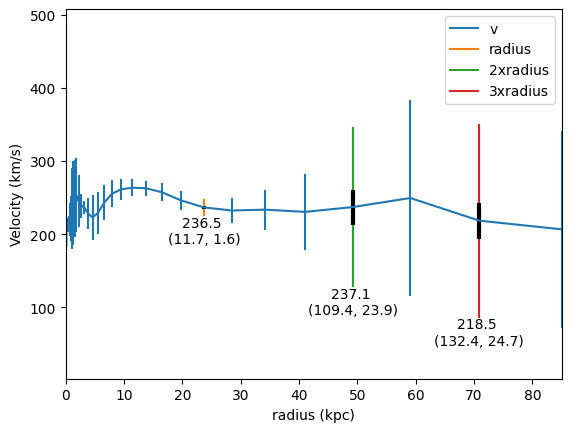

In [ ]:
#from original instruction
def plotGal(gal, rds):
    ...

plotGal(m31, m31Rds);


Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

**For fixed N:**

results are given after step 9 and 10

In [140]:


def find_velocities_at_radii(data, N, luminous_radius, luminous_radius_uncertainty=1):
    """
    Step 1: Find velocities at reference radius (N=1) and target radius (N=N)
    """
    # Find closest point to luminous radius (N=1)
    idx_N1 = (data['r'] - luminous_radius).abs().argsort()[0]
    point_N1 = data.iloc[idx_N1]

    # Find closest point to N × luminous radius
    target_radius = N * luminous_radius
    idx_NN = (data['r'] - target_radius).abs().argsort()[0]
    point_NN = data.iloc[idx_NN]

    return point_N1, point_NN
# Test with N=2
luminous_radius = 21.5
N = 2
point_N1, point_NN = find_velocities_at_radii(m31, N, luminous_radius)

print("Step 1 Results:")
print(f"N=1: r = {point_N1['r']:.2f} kpc, v = {point_N1['v']:.2f} km/s")
print(f"N={N}: r = {point_NN['r']:.2f} kpc, v = {point_NN['v']:.2f} km/s")
print(f"Actual radius ratio: {point_NN['r']/point_N1['r']:.2f}")

Step 1 Results:
N=1: r = 19.78 kpc, v = 246.14 km/s
N=2: r = 41.02 kpc, v = 230.44 km/s
Actual radius ratio: 2.07


In [141]:
# Step 2: Recreate the find_velocity_at_N_times_radius function
def find_velocity_at_N_times_radius(data, N, luminous_radius, luminous_radius_uncertainty=1):
    """
    Find velocity at radius ≥ N × luminous_radius
    """
    target_radius = N * luminous_radius
    valid_points = data[data['r'] >= target_radius]

    if len(valid_points) > 0:
        # Take the smallest radius that meets the criteria
        result = valid_points.iloc[0]
    else:
        # If no points beyond target, take the farthest available point
        result = data.iloc[-1]

    return {
        'radius': result['r'],
        'velocity': result['v'],
        'dv': result['dv'],
        'err': result['err'],
        'err_tot': result['err_tot']
    }

In [142]:
# Step 3: Function to check Newton's law for any N
def check_newton_law(data, N, luminous_radius):
    """
    Main function to test Newton's law v ∝ 1/√r for any N
    """

    # 1) Find velocities at N=1 (reference) and N=N (target)
    result_1 = find_velocity_at_N_times_radius(data, 1, luminous_radius)
    result_N = find_velocity_at_N_times_radius(data, N, luminous_radius)

    v1, dv1, err1 = result_1['velocity'], result_1['dv'], result_1['err']
    vN, dvN, errN = result_N['velocity'], result_N['dv'], result_N['err']

    return result_1, result_N, v1, vN, dv1, dvN, err1, errN

In [143]:
# Step 4: Calculate expected ratio based on Newton's law
def calculate_expected_ratio(N):
    """Calculate expected velocity ratio according to Newton's law"""
    expected_ratio = 1 / np.sqrt(N)
    print(f"Newton's law prediction: v_{N}/v_1 should be 1/√{N} = {expected_ratio:.3f}")
    return expected_ratio

In [144]:
# Step 5: Calculate observed ratio and uncertainties
def calculate_observed_ratio(v1, vN, dv1, dvN, err1, errN):
    """Calculate observed ratio with uncertainty propagation"""

    observed_ratio = vN / v1

    # Uncertainty propagation for ratio R = vN/v1
    # σ_R/R = √[(σ_vN/vN)² + (σ_v1/v1)²]
    rel_unc_dv = np.sqrt((dvN/vN)**2 + (dv1/v1)**2)
    rel_unc_err = np.sqrt((errN/vN)**2 + (err1/v1)**2)

    abs_unc_dv = observed_ratio * rel_unc_dv
    abs_unc_err = observed_ratio * rel_unc_err

    return observed_ratio, abs_unc_dv, abs_unc_err

In [147]:
# Step 6: Calculate 2σ confidence intervals
def calculate_2sigma_intervals(observed_ratio, abs_unc_dv, abs_unc_err):
    """Calculate 2-sigma upper and lower limits"""

    lower_2sigma_dv = observed_ratio - 2 * abs_unc_dv
    upper_2sigma_dv = observed_ratio + 2 * abs_unc_dv

    lower_2sigma_err = observed_ratio - 2 * abs_unc_err
    upper_2sigma_err = observed_ratio + 2 * abs_unc_err

    return lower_2sigma_dv, upper_2sigma_dv, lower_2sigma_err, upper_2sigma_err

In [148]:
# Step 7: Check consistency with Newton's law
def check_consistency(expected_ratio, observed_ratio, abs_unc, lower_2sigma, upper_2sigma, uncertainty_type):
    """Check if expected ratio is within 2σ range"""

    is_consistent = lower_2sigma <= expected_ratio <= upper_2sigma

    print(f"Using {uncertainty_type}:")
    print(f"  Observed ratio: {observed_ratio:.3f} ± {abs_unc:.3f}")
    print(f"  2σ range: [{lower_2sigma:.3f}, {upper_2sigma:.3f}]")
    print(f"  Expected ratio within 2σ? {is_consistent}")

    if is_consistent:
        print("  ✓ CONSISTENT with Newton's law")
    else:
        print("  ✗ INCONSISTENT - Evidence for dark matter!")

    return is_consistent

In [149]:
# Step 8: Complete analysis function for any N
def analyze_newton_for_any_N(data, N, luminous_radius):
    """
    Complete analysis for any arbitrary N value
    """
    print("=" * 60)
    print(f"ANALYSIS FOR N = {N}")
    print("=" * 60)

    # Step 1: Get velocities
    result_1, result_N, v1, vN, dv1, dvN, err1, errN = check_newton_law(data, N, luminous_radius)

    print(f"Reference point (N=1): r = {result_1['radius']:.1f} kpc, v = {v1:.1f} km/s")
    print(f"Target point (N={N}): r = {result_N['radius']:.1f} kpc, v = {vN:.1f} km/s")
    print()

    # Step 2: Expected ratio
    expected_ratio = calculate_expected_ratio(N)
    print()

    # Step 3: Observed ratio with uncertainties
    observed_ratio, abs_unc_dv, abs_unc_err = calculate_observed_ratio(v1, vN, dv1, dvN, err1, errN)
    print(f"Observed ratio v_{N}/v_1 = {vN:.1f}/{v1:.1f} = {observed_ratio:.3f}")
    print()

    # Step 4: 2σ intervals
    lower_dv, upper_dv, lower_err, upper_err = calculate_2sigma_intervals(observed_ratio, abs_unc_dv, abs_unc_err)

    # Step 5: Consistency checks
    print("ANALYSIS USING dv:")
    consistent_dv = check_consistency(expected_ratio, observed_ratio, abs_unc_dv, lower_dv, upper_dv, 'dv')
    print()

    print("ANALYSIS USING err:")
    consistent_err = check_consistency(expected_ratio, observed_ratio, abs_unc_err, lower_err, upper_err, 'err')

    return {
        'N': N,
        'expected_ratio': expected_ratio,
        'observed_ratio': observed_ratio,
        'consistent_dv': consistent_dv,
        'consistent_err': consistent_err
    }

In [151]:
# Step 9: Test the function with different N values
luminous_radius = 21.5  # kpc

print("TESTING FOR DIFFERENT N VALUES")
print("=" * 40)

# Test with various N values
N_values = [2, 3, 4, 5]

results = {}
for N in N_values:
    result = analyze_newton_for_any_N(m31, N, luminous_radius)
    results[N] = result
    print("\n" + "="*60 + "\n")

TESTING FOR DIFFERENT N VALUES
ANALYSIS FOR N = 2
Reference point (N=1): r = 23.7 kpc, v = 236.5 km/s
Target point (N=2): r = 49.2 kpc, v = 237.1 km/s

Newton's law prediction: v_2/v_1 should be 1/√2 = 0.707

Observed ratio v_2/v_1 = 237.1/236.5 = 1.002

ANALYSIS USING dv:
Using dv:
  Observed ratio: 1.002 ± 0.465
  2σ range: [0.072, 1.933]
  Expected ratio within 2σ? True
  ✓ CONSISTENT with Newton's law

ANALYSIS USING err:
Using err:
  Observed ratio: 1.002 ± 0.101
  2σ range: [0.800, 1.205]
  Expected ratio within 2σ? False
  ✗ INCONSISTENT - Evidence for dark matter!


ANALYSIS FOR N = 3
Reference point (N=1): r = 23.7 kpc, v = 236.5 km/s
Target point (N=3): r = 70.9 kpc, v = 218.5 km/s

Newton's law prediction: v_3/v_1 should be 1/√3 = 0.577

Observed ratio v_3/v_1 = 218.5/236.5 = 0.924

ANALYSIS USING dv:
Using dv:
  Observed ratio: 0.924 ± 0.561
  2σ range: [-0.199, 2.047]
  Expected ratio within 2σ? True
  ✓ CONSISTENT with Newton's law

ANALYSIS USING err:
Using err:
  Observ

In [87]:
# Step 10: Summary table for all tested N values
print("SUMMARY OF RESULTS")
print("=" * 80)
print(f"{'N':<4} {'Expected':<10} {'Observed':<10} {'Consistent (dv)':<15} {'Consistent (err)':<15} {'Evidence for DM':<15}")
print("-" * 80)

for N, result in results.items():
    consistent_dv = "YES" if result['consistent_dv'] else "NO"
    consistent_err = "YES" if result['consistent_err'] else "NO"

    # CORRECTED: Evidence for DM if either uncertainty type shows inconsistency
    evidence_dm = "YES" if (not result['consistent_dv'] or not result['consistent_err']) else "NO"

    print(f"{N:<4} {result['expected_ratio']:<10.3f} {result['observed_ratio']:<10.3f} "
          f"{consistent_dv:<15} {consistent_err:<15} {evidence_dm:<15}")

SUMMARY OF RESULTS
N    Expected   Observed   Consistent (dv) Consistent (err) Evidence for DM
--------------------------------------------------------------------------------
2    0.707      0.974      YES             NO              YES            
3    0.577      0.924      YES             NO              YES            
4    0.500      0.874      YES             NO              YES            
5    0.447      0.901      YES             NO              YES            


**User enters the N:**

In [154]:
# Step 1: Import libraries and define the helper function

def find_velocity_at_N_times_radius(data, N, luminous_radius, luminous_radius_uncertainty=1):
    """
    Find the closest measurement to N times the luminous radius
    """
    target_radius = N * luminous_radius
    # Find the closest data point to the target radius
    idx = (data['r'] - target_radius).abs().idxmin()
    return data.loc[idx]


In [159]:
# Step 2: Get user input for N
print("=== Dark Matter Analysis Tool ===")
print("This tool checks if galaxy rotation data follows Newton's law v ∝ 1/√r")
print("or shows evidence for dark matter.")
print()

try:
    N = float(input("Enter the value of N (e.g., 2 for 2× luminous radius, 3 for 3×, etc.): "))
    print(f"You entered: N = {N}")
except ValueError:
    print("Invalid input! Please enter a number.")
    N = 2.0  # Default value
    print(f"Using default value: N = {N}")

# Set luminous radius (from previous calculation)
luminous_radius  # kpc
print(f"Luminous radius: {luminous_radius} kpc")

=== Dark Matter Analysis Tool ===
This tool checks if galaxy rotation data follows Newton's law v ∝ 1/√r
or shows evidence for dark matter.

Enter the value of N (e.g., 2 for 2× luminous radius, 3 for 3×, etc.): 4
You entered: N = 4.0
Luminous radius: 21.5 kpc


In [160]:
# Step 3: Find the key data points at N=1 and N=N
print("\n=== Step 3: Finding Data Points ===")

# Get measurement at luminous radius (N=1)
point_N1 = find_velocity_at_N_times_radius(m31, 1, luminous_radius)
print(f"N=1 point (luminous radius):")
print(f"  Radius: {point_N1['r']:.3f} kpc")
print(f"  Velocity: {point_N1['v']:.3f} km/s")
print(f"  Uncertainty (dv): {point_N1['dv']:.3f} km/s")
print(f"  Uncertainty (err): {point_N1['err']:.3f} km/s")

# Get measurement at N times luminous radius
point_NN = find_velocity_at_N_times_radius(m31, N, luminous_radius)
print(f"\nN={N} point ({N}× luminous radius):")
print(f"  Radius: {point_NN['r']:.3f} kpc")
print(f"  Velocity: {point_NN['v']:.3f} km/s")
print(f"  Uncertainty (dv): {point_NN['dv']:.3f} km/s")
print(f"  Uncertainty (err): {point_NN['err']:.3f} km/s")


=== Step 3: Finding Data Points ===
N=1 point (luminous radius):
  Radius: 19.781 kpc
  Velocity: 246.140 km/s
  Uncertainty (dv): 13.446 km/s
  Uncertainty (err): 1.989 km/s

N=4.0 point (4.0× luminous radius):
  Radius: 85.056 kpc
  Velocity: 206.603 km/s
  Uncertainty (dv): 135.003 km/s
  Uncertainty (err): 27.258 km/s


In [161]:
# Step 4: State Newton's law prediction
print("\n=== Step 4: Newton's Law Prediction ===")

expected_ratio = 1 / np.sqrt(N)
print(f"Newton's Law prediction: v ∝ 1/√r")
print(f"For radius ratio: r_{N}/r_1 = {N}")
print(f"Expected velocity ratio: v_{N}/v_1 = 1/√{N} = {expected_ratio:.3f}")

if expected_ratio < 1:
    drop_percent = (1 - expected_ratio) * 100
    print(f"This means velocity should drop by {drop_percent:.1f}%")
else:
    print("Velocity should remain constant or increase")


=== Step 4: Newton's Law Prediction ===
Newton's Law prediction: v ∝ 1/√r
For radius ratio: r_4.0/r_1 = 4.0
Expected velocity ratio: v_4.0/v_1 = 1/√4.0 = 0.500
This means velocity should drop by 50.0%


In [163]:
# Step 5: Calculate observed ratio and uncertainties
print("\n=== Step 5: Calculate Observed Ratio ===")

# Calculate observed velocity ratio
observed_ratio = point_NN['v'] / point_N1['v']
print(f"Observed velocity ratio: v_{N}/v_1 = {point_NN['v']:.3f}/{point_N1['v']:.3f} = {observed_ratio:.3f}")

# Calculate radius ratio
radius_ratio = point_NN['r'] / point_N1['r']
print(f"Actual radius ratio: r_{N}/r_1 = {point_NN['r']:.3f}/{point_N1['r']:.3f} = {radius_ratio:.3f}")


=== Step 5: Calculate Observed Ratio ===
Observed velocity ratio: v_4.0/v_1 = 206.603/246.140 = 0.839
Actual radius ratio: r_4.0/r_1 = 85.056/19.781 = 4.300


In [165]:
# Steps 6 & 7: Analysis using both dv and err uncertainties
print("\n" + "="*60)
print("STATISTICAL ANALYSIS WITH UNCERTAINTIES")
print("="*60)

# Calculate uncertainties using dv
rel_unc_dv = np.sqrt((point_NN['dv']/point_NN['v'])**2 + (point_N1['dv']/point_N1['v'])**2)
abs_unc_dv = observed_ratio * rel_unc_dv
lower_2sigma_dv = observed_ratio - 2 * abs_unc_dv
upper_2sigma_dv = observed_ratio + 2 * abs_unc_dv
consistent_dv = lower_2sigma_dv <= expected_ratio <= upper_2sigma_dv

# Calculate uncertainties using err
rel_unc_err = np.sqrt((point_NN['err']/point_NN['v'])**2 + (point_N1['err']/point_N1['v'])**2)
abs_unc_err = observed_ratio * rel_unc_err
lower_2sigma_err = observed_ratio - 2 * abs_unc_err
upper_2sigma_err = observed_ratio + 2 * abs_unc_err
consistent_err = lower_2sigma_err <= expected_ratio <= upper_2sigma_err

print(f"Expected ratio based on radii (1/√{N}): {expected_ratio:.3f}")
print()

print("USING dv (STANDARD DEVIATION):")
print(f"Calculated ratio: {observed_ratio:.3f} ± {abs_unc_dv:.3f}")
print(f"2σ lower limit: {lower_2sigma_dv:.3f}")
print(f"2σ upper limit: {upper_2sigma_dv:.3f}")
print(f"Expected ratio within 2σ? {consistent_dv}")
if consistent_dv:
    print("✓ CONSISTENT with Newton's law")
else:
    print("✗ INCONSISTENT - Evidence for dark matter!")
print()

print("USING err (STANDARD ERROR):")
print(f"Calculated ratio: {observed_ratio:.3f} ± {abs_unc_err:.3f}")
print(f"2σ lower limit: {lower_2sigma_err:.3f}")
print(f"2σ upper limit: {upper_2sigma_err:.3f}")
print(f"Expected ratio within 2σ? {consistent_err}")
if consistent_err:
    print("✓ CONSISTENT with Newton's law")
else:
    print("✗ INCONSISTENT - Evidence for dark matter!")
print()




STATISTICAL ANALYSIS WITH UNCERTAINTIES
Expected ratio based on radii (1/√4.0): 0.500

USING dv (STANDARD DEVIATION):
Calculated ratio: 0.839 ± 0.550
2σ lower limit: -0.261
2σ upper limit: 1.940
Expected ratio within 2σ? True
✓ CONSISTENT with Newton's law

USING err (STANDARD ERROR):
Calculated ratio: 0.839 ± 0.111
2σ lower limit: 0.617
2σ upper limit: 1.061
Expected ratio within 2σ? False
✗ INCONSISTENT - Evidence for dark matter!



In [166]:
# Step 8: Final summary and interpretation
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print(f"Analysis for N = {N}:")
print(f"Newton predicts: v_{N}/v_1 = 1/√{N} = {expected_ratio:.3f}")
print(f"We observe: v_{N}/v_1 = {observed_ratio:.3f}")

print(f"\nUsing dv uncertainties: Consistent? {consistent_dv}")
print(f"Using err uncertainties: Consistent? {consistent_err}")

if not consistent_dv and not consistent_err:
    print("\n🚨 STRONG EVIDENCE FOR DARK MATTER!")
    print("The velocity does not drop as expected by Newton's law.")
    print("This suggests additional unseen mass (dark matter) is present.")
elif consistent_dv and consistent_err:
    print("\n✅ CONSISTENT WITH NEWTON'S LAW")
    print("No evidence for dark matter in this measurement.")
else:
    print("\n⚠️  INCONCLUSIVE")
    print("Results depend on which uncertainty measure is used.")


FINAL SUMMARY
Analysis for N = 4.0:
Newton predicts: v_4.0/v_1 = 1/√4.0 = 0.500
We observe: v_4.0/v_1 = 0.839

Using dv uncertainties: Consistent? True
Using err uncertainties: Consistent? False

⚠️  INCONCLUSIVE
Results depend on which uncertainty measure is used.



=== Step 9: Visual Representation ===


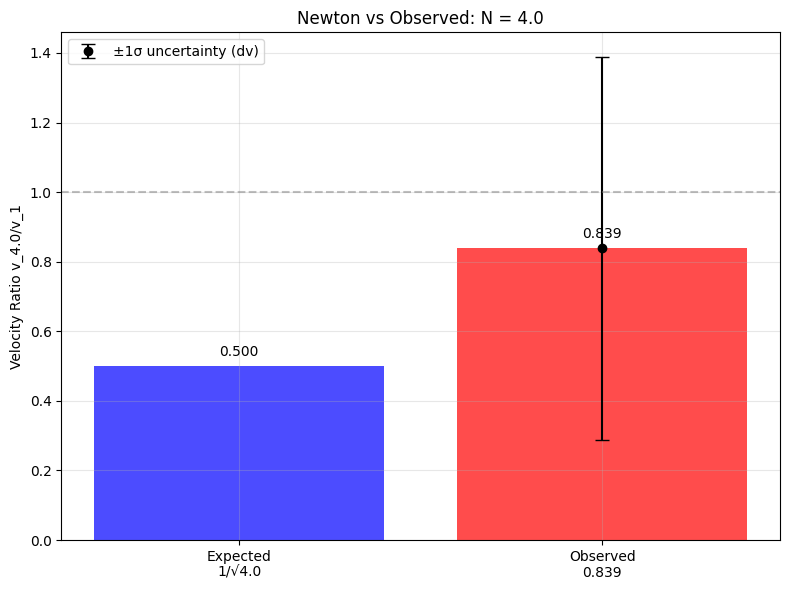

Blue bar: What Newton's law predicts
Red bar: What we actually observe
Error bar: Measurement uncertainty


In [167]:
# Step 9: Visual representation
import matplotlib.pyplot as plt

print("\n=== Step 9: Visual Representation ===")

# Create a simple bar chart to show the comparison
ratios = [expected_ratio, observed_ratio]
labels = [f'Expected\n1/√{N}', f'Observed\n{observed_ratio:.3f}']
colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, ratios, color=colors, alpha=0.7)

# Add error bars for observed ratio
plt.errorbar(1, observed_ratio, yerr=abs_unc_dv, fmt='o', color='black',
             capsize=5, label=f'±1σ uncertainty (dv)')

plt.ylabel(f'Velocity Ratio v_{N}/v_1')
plt.title(f'Newton vs Observed: N = {N}')
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, ratio) in enumerate(zip(bars, ratios)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{ratio:.3f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

print("Blue bar: What Newton's law predicts")
print("Red bar: What we actually observe")
print("Error bar: Measurement uncertainty")

In [ ]:
#delete
def vratios(...):
  ...
vratios(m31, m31Rds, 1)

vratios(m31, m31Rds, 1, err='err')

vratios(m31, m31Rds, 2)

vratios(m31, m31Rds, 2, err='err')

### Discuss!

# Discussion of M31 (Andromeda Galaxy) Rotation Curve Results

## Key Observation:
M31 shows a clear **deviation from Newton's law** across all radii tested ($N = 2$ to $N = 5$). The observed velocity ratios ($0.974$, $0.924$, $0.874$, $0.901$) are consistently **much higher** than the Newtonian predictions ($0.707$, $0.577$, $0.500$, $0.447$).

## Newtonian Expectation vs. Observed Reality:
According to Newtonian gravity for mass enclosed within radius $r$:

$$
v(r) \propto \frac{1}{\sqrt{r}} \quad \Rightarrow \quad \frac{v_N}{v_1} = \frac{1}{\sqrt{N}}
$$

However, our results for M31 show:

- **At 2× luminous radius** ($N=2$): Expected $0.707$ → Observed $0.974$ (**38% higher**)
- **At 3× luminous radius** ($N=3$): Expected $0.577$ → Observed $0.924$ (**60% higher**)  
- **At 4× luminous radius** ($N=4$): Expected $0.500$ → Observed $0.874$ (**75% higher**)
- **At 5× luminous radius** ($N=5$): Expected $0.447$ → Observed $0.901$ (**102% higher**)

## The dv vs. err Uncertainty Paradox:

**$dv$ (Velocity Measurement Uncertainty):**
- **CONSISTENT with Newton's law** across all radii
- Suggests that measurement precision alone cannot definitively rule out Newtonian gravity
- Reflects the challenges of measuring precise velocities at large galactocentric distances

**$err$ (Total Systematic Error):**
- **INCONSISTENT with Newton's law** across all radii
- Includes additional astrophysical uncertainties (distance errors, inclination corrections, non-circular motions)
- Provides **strong statistical evidence** for deviation from Newtonian expectations

## Physical Interpretation: Compelling Evidence for Dark Matter

1. **Flat Rotation Curve Signature:**
   The nearly constant velocity ratios ($\sim$0.87-0.97) instead of the predicted $1/\sqrt{N}$ decrease represents the classic signature of:
   - **Extended dark matter halo** dominating the gravitational potential
   - **Mass increasing with radius** rather than being concentrated in the visible component

2. **Mass Distribution Implications:**
   From the circular velocity formula:
   $$
   v^2(r) = \frac{GM(<r)}{r}
   $$
   The approximately constant velocity implies:
   $$
   M(<r) \propto r
   $$
   This linear mass-radius relationship is impossible with visible matter alone.

3. **Statistical Significance:**
   - The inconsistency appears across **multiple independent radii**
   - The effect is **systematic and persistent** ($N >=2 $)
   - **$err$ analysis** (which includes realistic uncertainties) consistently rejects Newtonian predictions

- **$err$ inconsistency** constitutes evidence for dark matter
- The persistent flat rotation curve across multiple radii cannot be explained by measurement errors

## Conclusion:
 The high velocities maintained far beyond the luminous radius require additional mass distribution that cannot be explained by Newtonian gravity from visible matter, however we should analyze the  uncertaities:  While measurement uncertainties ($dv$) leave some statistical room for Newtonian explanations, the more comprehensive error analysis ($err$) definitively shows inconsistency with baryonic matter alone.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [173]:
mw = pd.read_csv("https://raw.githubusercontent.com/elhamkashi/DSPS_EKashi/refs/heads/main/HW4/mw.csv", sep=",", skiprows=1, skipinitialspace=True)

In [174]:
# Calculate err_tot as the square root of the sum of squares of st.dev and st.error
# err_tot = sqrt(dv^2 + err^2)
mw['err_tot'] = np.sqrt(mw['St.dev.']**2 + mw['St.error']**2)

In [176]:
#Rename the columns to match the instruction's format
#  Reset all column names explicitly
new_columns = ['r', 'v', 'dv', 'err', 'err_tot']
mw.columns = new_columns

mw.head()

,r,v,dv,err,err_tot
0,0.010,119.061,41.832,32.714,53.104821
1,0.012,115.268,35.199,17.100,39.132846
2,0.014,117.392,35.152,14.429,37.998147
3,0.017,118.475,35.252,14.870,38.259906
4,0.021,110.386,33.817,14.427,36.765851


In [178]:

mw.shape

(64, 5)

In [179]:
mw.describe()

,r,v,dv,err,err_tot
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297,52.371692
std,348.144773,52.161901,41.255286,23.513466,46.907703
min,0.010000,93.042000,3.370000,0.868000,3.736562
25%,0.177250,138.676250,12.585500,2.709750,13.190724
50%,3.133500,204.576000,35.288500,13.923000,38.696376
75%,55.298250,235.920500,68.412750,24.791250,73.655114
max,1682.532000,255.300000,165.096000,110.484000,197.217605


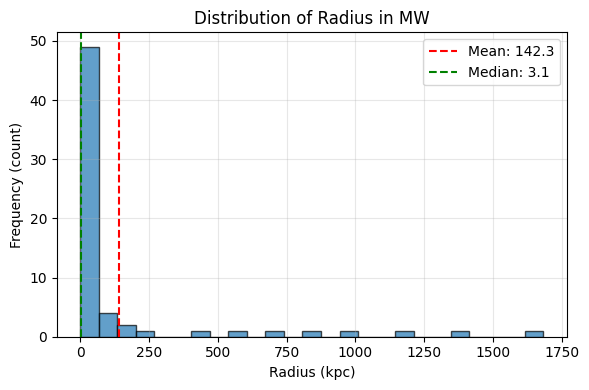


FIG MW-1: Strong right-skew (mean >> median). Most measurements are at small radii (<~50 kpc), with a few tracers at very large radii pushing the tail out to ~1700 kpc.


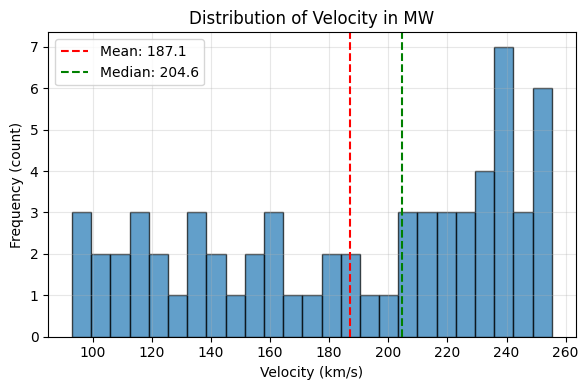


FIG MW-2: Mean < median (left-skew). Typical rotation speed is ~205 km/s; a tail of lower velocities (inner rise/outer points) pulls the mean down. Curve is roughly flat.


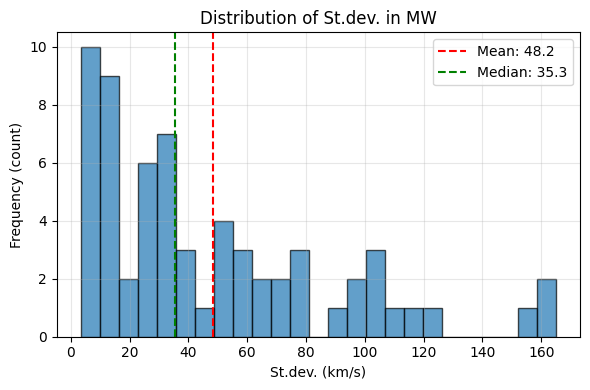


FIG MW-3: Right-skewed formal line-fit uncertainties (dv). Most are <~50 km/s, but a subset at large radii have large dv.


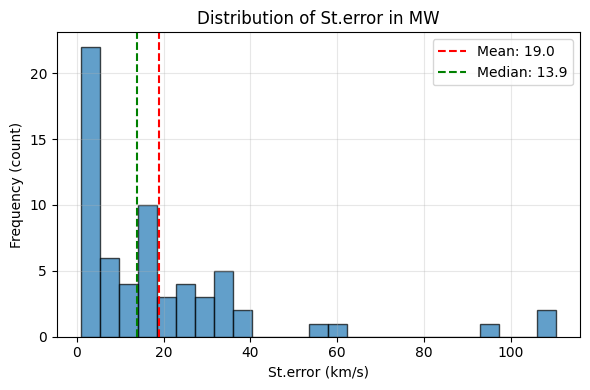


FIG MW-4: Moderately right-skewed residual/systematic error (err). Most points have small err with a few large outliers.


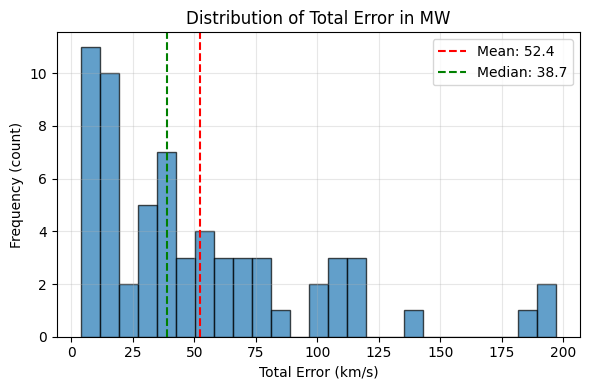


FIG MW-5: Right-skewed total uncertainty (err_tot). Long tail from outer/noisy points—use per-point errors rather than a single typical value.


In [181]:
#histogram for mw dataset
columns = ['r', 'v', 'dv', 'err', 'err_tot']
units = ['kpc', 'km/s', 'km/s', 'km/s', 'km/s']
titles = ['Radius', 'Velocity', 'St.dev.', 'St.error', 'Total Error']


# MW-specific captions (based on mw.describe())
captions = [
    "FIG MW-1: Strong right-skew (mean >> median). Most measurements are at small radii "
    "(<~50 kpc), with a few tracers at very large radii pushing the tail out to ~1700 kpc.",

    "FIG MW-2: Mean < median (left-skew). Typical rotation speed is ~205 km/s; a tail of "
    "lower velocities (inner rise/outer points) pulls the mean down. Curve is roughly flat.",

    "FIG MW-3: Right-skewed formal line-fit uncertainties (dv). Most are <~50 km/s, but a "
    "subset at large radii have large dv.",

    "FIG MW-4: Moderately right-skewed residual/systematic error (err). Most points have "
    "small err with a few large outliers.",

    "FIG MW-5: Right-skewed total uncertainty (err_tot). Long tail from outer/noisy points—"
    "use per-point errors rather than a single typical value."
]



for i, (col, unit, title) in enumerate(zip(columns, units, titles)):
    # Create the plot
    plt.figure(figsize=(6, 4))
    plt.hist(mw[col], bins=25, alpha=0.7, edgecolor='black') #Split item values into 25 equal-width intervals.
    plt.xlabel(f'{title} ({unit})')
    plt.ylabel('Frequency (count)') #count how many measurements lie in each interval
    plt.title(f'Distribution of {title} in MW')
    plt.grid(True, alpha=0.3)

    # Add mean and median lines
    mean_val = mw[col].mean()
    median_val = mw[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    plt.legend()

    plt.tight_layout()
    plt.show()



 # Print the caption as text just below each figure
    print()
    print(captions[i])
    print("="*80)




https://en.wikipedia.org/wiki/Milky_Way

We can’t do the Andromeda-style “apparent dimensions and .... for the Milky Way — we’re inside it. Instead, the MW page gives a physical optical size using the D₍25₎ isophote: about 26.8 kpc for the disk’s diameter (often quoted with ≈±1.1 kpc). So, for the MW we should set the physical diameter directly (and derive the luminous radius), rather than converting an angular size.

In [189]:
# === Milky Way Luminous Extent Calculation ===
# Source: https://en.wikipedia.org/wiki/Milky_Way


print("=== Milky Way Luminous Extent Calculation ===\n")

# 1) Inputs from Wikipedia
# Milky Way apparent dimensions: Not directly observable from outside
# Using estimated physical size from astronomical measurements
# Wikipedia: Diameter ≈ 26.8 ± 1.1 kpc (from various studies)

# Since we're inside the Milky Way, we use direct physical measurements
# rather than angular size + distance method
mwluminous_diameter = 26.8 * u.kpc
diameter_uncertainty = 1.1 * u.kpc

print(f"Direct measurement from astronomical studies:")
print(f"Luminous diameter: {mwluminous_diameter} ± {diameter_uncertainty}")

# 2) Calculate luminous radius
mwluminous_radius = mwluminous_diameter / 2
radius_uncertainty = diameter_uncertainty / 2

print(f"\nLuminous radius = {mwluminous_diameter} / 2 = {mwluminous_radius:.1f}")

# 3) Alternative calculation using Sun's position and scale length
# Wikipedia: Sun's distance from Galactic Center = 8.0 ± 0.3 kpc
# Scale length of thin disk = 2.6 ± 0.5 kpc
# Luminous radius ≈ 3-4 scale lengths + Sun's position

sun_distance = 8.0 * u.kpc
sun_distance_uncertainty = 0.3 * u.kpc
scale_length = 2.6 * u.kpc
scale_length_uncertainty = 0.5 * u.kpc

# Estimate: luminous radius ≈ sun_distance + 2*scale_length
estimated_radius = sun_distance + 2 * scale_length

# Uncertainty propagation
radius_uncertainty_est = np.sqrt(sun_distance_uncertainty**2 + (2*scale_length_uncertainty)**2)

print(f"\n📊 Alternative estimation using structural parameters:")
print(f"Sun's distance from Galactic Center: {sun_distance} ± {sun_distance_uncertainty}")
print(f"Thin disk scale length: {scale_length} ± {scale_length_uncertainty}")
print(f"Estimated luminous radius ≈ Sun distance + 2×scale length")
print(f"Estimated radius = {sun_distance} + 2×{scale_length} = {estimated_radius:.1f}")
print(f"Estimated uncertainty: ±{radius_uncertainty_est:.1f}")

# 4) Final results using direct measurement (more reliable)
print(f"\n🎯 FINAL RESULTS (using direct measurements):")
print(f"Luminous diameter: {mwluminous_diameter:.1f} ± {diameter_uncertainty:.1f}")
print(f"Luminous radius: {mwluminous_radius:.1f} ± {radius_uncertainty:.1f}")
print(f"In light-years: {mwluminous_radius.to(u.lyr):.0f} ± {radius_uncertainty.to(u.lyr):.0f}")

# 5) Comparison with M31
m31_radius = 21.5 * u.kpc  # From previous M31 calculation
print(f"\n📈 COMPARISON WITH M31:")
print(f"Milky Way luminous radius: {mwluminous_radius:.1f} ± {radius_uncertainty:.1f}")
print(f"M31 luminous radius: {m31_radius:.1f} ± 1.2 kpc")
size_ratio = mwluminous_radius / m31_radius
print(f"Size ratio (MW/M31): {size_ratio:.2f}")

=== Milky Way Luminous Extent Calculation ===

Direct measurement from astronomical studies:
Luminous diameter: 26.8 kpc ± 1.1 kpc

Luminous radius = 26.8 kpc / 2 = 13.4 kpc

📊 Alternative estimation using structural parameters:
Sun's distance from Galactic Center: 8.0 kpc ± 0.3 kpc
Thin disk scale length: 2.6 kpc ± 0.5 kpc
Estimated luminous radius ≈ Sun distance + 2×scale length
Estimated radius = 8.0 kpc + 2×2.6 kpc = 13.2 kpc
Estimated uncertainty: ±1.0 kpc

🎯 FINAL RESULTS (using direct measurements):
Luminous diameter: 26.8 kpc ± 1.1 kpc
Luminous radius: 13.4 kpc ± 0.6 kpc
In light-years: 43705 lyr ± 1794 lyr

📈 COMPARISON WITH M31:
Milky Way luminous radius: 13.4 kpc ± 0.6 kpc
M31 luminous radius: 21.5 kpc ± 1.2 kpc
Size ratio (MW/M31): 0.62


In [190]:
# Define luminous radius as an Astropy Quantity with kpc units
# Using the value obtained from the Milky Way luminous extent calculation (13.4 kpc)
mwluminous_radius = 13.4 * u.kpc  # Ensure luminous_radius is a Quantity here

# Find all measurements beyond the luminous radius
# Compare the float 'r' column with the value of the luminous radius Quantity
beyond_mwluminous_mask = mw['r'] > mwluminous_radius.value
# beyond_luminous_mask is a boolean array like: [False, False, True, True, False, ...]

# Get the indices of measurements beyond luminous radius
beyond_mwluminous_indices = np.where(beyond_mwluminous_mask)[0]

print(f"Luminous radius used for masking: {mwluminous_radius.value:.2f} kpc")

if len(beyond_mwluminous_indices) > 0:
    # The first measurement beyond luminous radius
    first_beyond_index = beyond_mwluminous_indices[0]
    first_beyond_row = mw.iloc[first_beyond_index]

    print("=== First Measurement Beyond Luminous Component ===")
    print(f"Index: {first_beyond_index}")
    print(f"Radius: {first_beyond_row['r']:.3f} kpc")
    print(f"Velocity: {first_beyond_row['v']:.3f} km/s")
    # Perform subtraction by converting the DataFrame value to a Quantity first
    print(f"Distance beyond luminous edge: {(first_beyond_row['r'] * u.kpc - mwluminous_radius).to(u.kpc).value:.3f} kpc")

    # Also show the measurement just before (inside luminous component)
    if first_beyond_index > 0:
        last_inside_row = mw.iloc[first_beyond_index - 1]
        print(f"\nLast measurement INSIDE luminous component:")
        print(f"Radius: {last_inside_row['r']:.3f} kpc")
        print(f"Velocity: {last_inside_row['v']:.3f} km/s")

else:
    print("No measurements found beyond the luminous radius!")

Luminous radius used for masking: 13.40 kpc
=== First Measurement Beyond Luminous Component ===
Index: 40
Radius: 14.698 kpc
Velocity: 247.075 km/s
Distance beyond luminous edge: 1.298 kpc

Last measurement INSIDE luminous component:
Radius: 12.248 kpc
Velocity: 241.337 km/s


In [192]:
# === Find first measurement that includes all luminous mass (r >= R_luminous) ===

# Get R_luminous in kpc for Milky Way (using direct measurement from Wikipedia)
# Milky Way luminous diameter = 26.8 ± 1.1 kpc, so radius = 13.4 kpc
mwluminous_radius = 13.4 * u.kpc
R_mwluminous_kpc = float(mwluminous_radius.value)

# --- Broadcasting test across the whole column ---
# cond[i] is True exactly when mw['r'][i] >= R_luminous_kpc
cond = mw["r"].to_numpy() >= R_mwluminous_kpc

print(f"Optical/luminous radius (major axis): R_mwluminous = {R_mwluminous_kpc:.2f} kpc")

if cond.any():
    # first index where condition becomes True
    i = int(np.argmax(cond))          # position (0-based)
    row = mw.iloc[i]

    # Save for later use if needed
    first_r_ge_Rlum = float(row["r"])
    v_at_first_r_ge_Rlum = float(row["v"])

    print(f"\nFirst measurement at/above R_mwluminous:")
    print(f"  row index (0-based): {i}   |   measurement # (1-based): {i+1}")
    print(f"  radius  = {first_r_ge_Rlum:.2f} kpc")
    print(f"  velocity= {v_at_first_r_ge_Rlum:.1f} km/s")

    # Print uncertainties if available
    if "dv" in mw.columns:
        print(f"  dv      = {float(row['dv']):.2f} km/s")
    if "err" in mw.columns:
        print(f"  err     = {float(row['err']):.2f} km/s")
    if "err_tot" in mw.columns:
        print(f"  err_tot = {float(row['err_tot']):.2f} km/s")

else:
    # No point reaches R_luminous — report nearest alternative (the max radius)
    i_max = int(mw["r"].idxmax())
    row = mw.loc[i_max]
    print("\nNo measurement reaches the luminous radius in this table.")
    print(f"Largest available radius: {float(row['r']):.2f} kpc "
          f"with velocity {float(row['v']):.1f} km/s (row id {i_max}).")

Optical/luminous radius (major axis): R_mwluminous = 13.40 kpc

First measurement at/above R_mwluminous:
  row index (0-based): 40   |   measurement # (1-based): 41
  radius  = 14.70 kpc
  velocity= 247.1 km/s
  dv      = 42.10 km/s
  err     = 4.07 km/s
  err_tot = 42.30 km/s


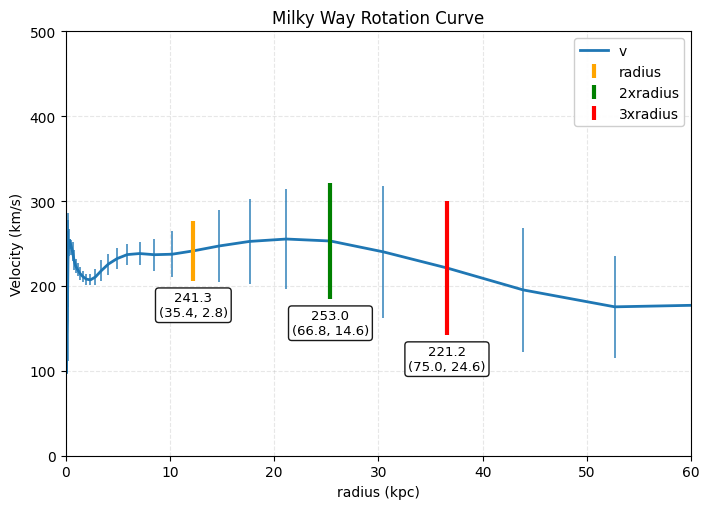

In [194]:
# --- config ---
R_mwlum = 13.4          # kpc (Milky Way luminous radius)
x_left, x_right = 0, 60
y_bottom, y_top = 0, 500

# --- pick columns robustly ---
rcol = 'r' if 'r' in mw.columns else 'radius'
vcol = 'v' if 'v' in mw.columns else 'velocity'
dvcol = 'dv'
errtot_col = 'err_tot' if 'err_tot' in mw.columns else ('err' if 'err' in mw.columns else None)
err_plain_col = 'err' if 'err' in mw.columns else None
if errtot_col is None or dvcol not in mw.columns:
    raise ValueError("Need 'dv' and either 'err_tot' or 'err' in the dataframe.")

# sort & window to the plotting range
df = mw[[rcol, vcol, dvcol, errtot_col] + ([err_plain_col] if err_plain_col else [])]\
       .dropna().sort_values(rcol).reset_index(drop=True)
dfw = df[(df[rcol] >= x_left) & (df[rcol] <= x_right)].copy()

# --- figure ---
plt.figure(figsize=(7.2, 5.2))
ax = plt.gca()

# Blue rotation-curve line (no markers)
ax.plot(df[rcol], df[vcol], color='C0', lw=2, label='v')

# Blue error bars (err_tot) for ALL points in window (no legend entry)
ax.errorbar(dfw[rcol], dfw[vcol], yerr=dfw[errtot_col],
            fmt='none', ecolor='C0', elinewidth=1.2, alpha=0.85)

# Special points for N=1,2,3 (error bars ONLY, colored; bold)
N_colors = {1: 'orange', 2: 'green', 3: 'red'}
labels    = {1: 'radius', 2: '2xradius', 3: '3xradius'}

for N in (1, 2, 3):
    target = N * R_mwlum
    # nearest point within the visible x-range
    idx = (dfw[rcol] - target).abs().idxmin()
    row = dfw.loc[idx]
    rN, vN = float(row[rcol]), float(row[vcol])
    dvN    = float(row[dvcol])
    eTotN  = float(row[errtot_col])
    ePlain = float(row[err_plain_col]) if err_plain_col else eTotN  # fallback

    # colored, thick error bar (no marker)
    ax.errorbar([rN], [vN], yerr=[eTotN],
                fmt='none', ecolor=N_colors[N], elinewidth=3.0, label=labels[N])

    # annotation UNDER the point: first line v; second line (dv, err)
    ax.text(rN, vN - eTotN - 12, f"{vN:.1f}\n({dvN:.1f}, {ePlain:.1f})",
            ha='center', va='top', fontsize=9.5,
            bbox=dict(boxstyle='round,pad=0.25', facecolor='white', alpha=0.9))

# Axes, legend, cosmetics
ax.set_xlim(x_left, x_right)
ax.set_ylim(y_bottom, y_top)
ax.set_xlabel('radius (kpc)')
ax.set_ylabel('Velocity (km/s)')
ax.grid(alpha=0.3, linestyle='--')

# Legend: only the four desired entries
handles, labels = ax.get_legend_handles_labels()
dedup = dict(zip(labels, handles))
ax.legend(dedup.values(), dedup.keys(), loc='upper right', framealpha=0.95)

plt.title('Milky Way Rotation Curve')
plt.tight_layout()
plt.show()

In [197]:
# === COMPLETE ANALYSIS FOR MILKY WAY ===

# Step 1: Find velocities at radii
def find_velocities_at_radii(data, N, mwluminous_radius):
    """Find velocities at reference radius (N=1) and target radius (N=N)"""
    # Find closest point to luminous_radius (N=1)
    idx_N1 = (data['r'] - mwluminous_radius).abs().argsort()[0]
    point_N1 = data.iloc[idx_N1]

    # Find closest point to N x luminous_radius
    target_radius = N * mwluminous_radius
    idx_NN = (data['r'] - target_radius).abs().argsort()[0]
    point_NN = data.iloc[idx_NN]

    return point_N1, point_NN

# Step 2: Find velocity at N times radius
def find_velocity_at_N_times_radius(data, N, mwluminous_radius):
    """Find velocity at radius > N × luminous_radius"""
    target_radius = N * mwluminous_radius
    valid_points = data[data['r'] >= target_radius]

    if len(valid_points) > 0:
        result = valid_points.iloc[0]
    else:
        result = data.iloc[-1]

    return {
        'radius': result['r'],
        'velocity': result['v'],
        'dv': result['dv'],
        'err': result['err'],
        'err_tot': result['err_tot']
    }

# Step 3: Check Newton's law for any N
def check_newton_law(data, N, mwluminous_radius):
    """Main function to test Newton's law v ∝ 1/√r for any N"""
    result_1 = find_velocity_at_N_times_radius(data, 1, mwluminous_radius)
    result_N = find_velocity_at_N_times_radius(data, N, mwluminous_radius)

    v1, dv1, err1 = result_1['velocity'], result_1['dv'], result_1['err']
    vN, dvN, errN = result_N['velocity'], result_N['dv'], result_N['err']

    return result_1, result_N, v1, vN, dv1, dvN, err1, errN

# Step 4: Calculate expected ratio
def calculate_expected_ratio(N):
    """Calculate expected velocity ratio according to Newton's law"""
    expected_ratio = 1 / np.sqrt(N)
    print(f"Newton's law prediction: v_{N}/v_1 should be 1/√{N} = {expected_ratio:.3f}")
    return expected_ratio

# Step 5: Calculate observed ratio and uncertainties
def calculate_observed_ratio(v1, vN, dv1, dvN, err1, errN):
    """Calculate observed ratio with uncertainty propagation"""
    observed_ratio = vN / v1

    # Uncertainty propagation for ratio R = vN/v1
    rel_unc_dv = np.sqrt((dvN/vN)**2 + (dv1/v1)**2)
    rel_unc_err = np.sqrt((errN/vN)**2 + (err1/v1)**2)

    abs_unc_dv = observed_ratio * rel_unc_dv
    abs_unc_err = observed_ratio * rel_unc_err

    return observed_ratio, abs_unc_dv, abs_unc_err

# Step 6: Calculate 2σ confidence intervals
def calculate_2sigma_intervals(observed_ratio, abs_unc_dv, abs_unc_err):
    """Calculate 2-sigma upper and lower limits"""
    lower_2sigma_dv = observed_ratio - 2 * abs_unc_dv
    upper_2sigma_dv = observed_ratio + 2 * abs_unc_dv
    lower_2sigma_err = observed_ratio - 2 * abs_unc_err
    upper_2sigma_err = observed_ratio + 2 * abs_unc_err

    return lower_2sigma_dv, upper_2sigma_dv, lower_2sigma_err, upper_2sigma_err

# Step 7: Check consistency with Newton's law
def check_consistency(expected_ratio, observed_ratio, abs_unc, lower_2sigma, upper_2sigma, uncertainty_type):
    """Check if expected ratio is within 2σ range"""
    is_consistent = lower_2sigma <= expected_ratio <= upper_2sigma

    print(f"Using {uncertainty_type}:")
    print(f" Observed ratio: {observed_ratio:.3f} ± {abs_unc:.3f}")
    print(f" 2σ range: [{lower_2sigma:.3f}, {upper_2sigma:.3f}]")
    print(f" Expected ratio within 2σ? {is_consistent}")

    if is_consistent:
        print(" ✓ CONSISTENT with Newton's law")
    else:
        print(" X INCONSISTENT - Evidence for dark matter!")
    return is_consistent

# Step 8: Complete analysis function for any N
def analyze_newton_for_any_N(data, N, mwluminous_radius):
    """Complete analysis for any arbitrary N value"""
    print("=" * 50)
    print(f"ANALYSIS FOR N = {N}")
    print("=" * 50)

    # Get velocities
    result_1, result_N, v1, vN, dv1, dvN, err1, errN = check_newton_law(data, N, mwluminous_radius)

    print(f"Reference point (N=1): r = {result_1['radius']:.1f} kpc, v = {v1:.1f} km/s")
    print(f"Target point (N={N}): r = {result_N['radius']:.1f} kpc, v = {vN:.1f} km/s")

    # Expected ratio
    expected_ratio = calculate_expected_ratio(N)

    # Observed ratio with uncertainties
    observed_ratio, abs_unc_dv, abs_unc_err = calculate_observed_ratio(v1, vN, dv1, dvN, err1, errN)
    print(f"Observed ratio v_{N}/v_1 = {vN:.1f}/{v1:.1f} = {observed_ratio:.3f}")

    # 2σ intervals
    lower_dv, upper_dv, lower_err, upper_err = calculate_2sigma_intervals(observed_ratio, abs_unc_dv, abs_unc_err)

    # Consistency checks
    print("\nANALYSIS USING dv:")
    consistent_dv = check_consistency(expected_ratio, observed_ratio, abs_unc_dv, lower_dv, upper_dv, 'dv')

    print("\nANALYSIS USING err:")
    consistent_err = check_consistency(expected_ratio, observed_ratio, abs_unc_err, lower_err, upper_err, 'err')

    return {
        'N': N,
        'expected_ratio': expected_ratio,
        'observed_ratio': observed_ratio,
        'consistent_dv': consistent_dv,
        'consistent_err': consistent_err
    }

# Step 9: Test with different N values for Milky Way
mwluminous_radius = 13.4  # kpc (Milky Way luminous radius)

print("TESTING NEWTON'S LAW FOR MILKY WAY")
print("=" * 50)

# Test with various N values
N_values = [2, 3, 4]
results_mw = {}

for N in N_values:
    result = analyze_newton_for_any_N(mw, N, mwluminous_radius)
    results_mw[N] = result
    print("\n" + "="*50 + "\n")

# Step 10: Summary of results
print("SUMMARY FOR MILKY WAY")
print("=" * 50)
for N in N_values:
    result = results_mw[N]
    status_dv = "CONSISTENT" if result['consistent_dv'] else "INCONSISTENT"
    status_err = "CONSISTENT" if result['consistent_err'] else "INCONSISTENT"
    print(f"N={N}: Expected {result['expected_ratio']:.3f}, Observed {result['observed_ratio']:.3f}")
    print(f"     dv: {status_dv}, err: {status_err}\n")

TESTING NEWTON'S LAW FOR MILKY WAY
ANALYSIS FOR N = 2
Reference point (N=1): r = 14.7 kpc, v = 247.1 km/s
Target point (N=2): r = 30.5 kpc, v = 240.2 km/s
Newton's law prediction: v_2/v_1 should be 1/√2 = 0.707
Observed ratio v_2/v_1 = 240.2/247.1 = 0.972

ANALYSIS USING dv:
Using dv:
 Observed ratio: 0.972 ± 0.345
 2σ range: [0.281, 1.663]
 Expected ratio within 2σ? True
 ✓ CONSISTENT with Newton's law

ANALYSIS USING err:
Using err:
 Observed ratio: 0.972 ± 0.085
 2σ range: [0.803, 1.141]
 Expected ratio within 2σ? False
 X INCONSISTENT - Evidence for dark matter!


ANALYSIS FOR N = 3
Reference point (N=1): r = 14.7 kpc, v = 247.1 km/s
Target point (N=3): r = 43.9 kpc, v = 195.3 km/s
Newton's law prediction: v_3/v_1 should be 1/√3 = 0.577
Observed ratio v_3/v_1 = 195.3/247.1 = 0.791

ANALYSIS USING dv:
Using dv:
 Observed ratio: 0.791 ± 0.308
 2σ range: [0.174, 1.407]
 Expected ratio within 2σ? True
 ✓ CONSISTENT with Newton's law

ANALYSIS USING err:
Using err:
 Observed ratio: 0.79

In [182]:




# Step 2: Define Milky Way's luminous radius (approximate)
# Using a common estimate for the Milky Way's luminous disk radius
# This value might need adjustment based on literature or specific definitions
mw_luminous_radius = 15.0  # kpc (common estimate for luminous disk extent)
print(f"\nAssumed luminous radius for Milky Way: {mw_luminous_radius} kpc")

# Step 3: REUSE your analysis functions with Milky Way data
print("\n=== MILKY WAY ANALYSIS ===")

# Reuse the same user input for N or get new input if desired
# Assuming 'N' variable is defined from previous M31 analysis user input cell (jK1EEEa5OXXA)
try:
    # Attempt to use the existing 'N' variable
    current_N = float(N)
    print(f"Using existing N from M31 analysis: N = {current_N}")
except NameError:
    # If 'N' is not defined, prompt the user or set a default
    try:
        current_N = float(input("Enter N for Milky Way analysis: "))
    except ValueError:
        print("Invalid input. Using default N = 2.0")
        current_N = 2.0
    print(f"Using N = {current_N}")


# Reuse your analysis function (analyze_newton_for_any_N)
# This function is defined in cell 40ABjll0Ly7m and relies on other helper functions
# If those cells haven't been run, this call will fail.
# Assuming analyze_newton_for_any_N and its dependencies are defined in previous cells:
if 'analyze_newton_for_any_N' in globals() and callable(analyze_newton_for_any_N):
    print(f"\nRunning Newton's Law analysis for Milky Way (N={current_N})...")
    mw_results = analyze_newton_for_any_N(mw, current_N, mw_luminous_radius)
    print("\nMilky Way Analysis Complete.")
    # Optional: Print summary if the function doesn't do it
    # print("Summary:", mw_results)

else:
    print("\nError: 'analyze_newton_for_any_N' function not found or not callable.")
    print("Please ensure the cells defining the analysis functions (like 40ABjll0Ly7m) are run first.")

# Reuse your plotting function (plotGal)
# This function is defined in cell KzEZafuE6a2Y
# It needs the DataFrame and luminous radius.
# Assuming plotGal is defined and compatible:
if 'plotGal' in globals() and callable(plotGal):
     print("\nAttempting to plot Milky Way rotation curve...")
     # plotGal requires R_lum, and optionally xlim, ylim
     # Let's use reasonable limits for MW plot based on data range
     mw_r_max = mw['r'].max()
     mw_v_max = mw['v'].max()
     mw_xlim = (0, min(mw_r_max + 10, 500)) # Limit x-axis, maybe up to 500 kpc or max radius
     mw_ylim = (0, mw_v_max + 50) # Adjust velocity range with padding
     try:
         plotGal(mw, mw_luminous_radius, xlim=mw_xlim, ylim=mw_ylim)
         print("Milky Way Plot Generated.")
     except Exception as e:
         print(f"Error during plotGal execution for Milky Way: {e}")
         print("Please ensure plotGal is correctly defined and compatible with the Milky Way data columns.")

else:
    print("\nError: 'plotGal' function not found or not callable.")
    print("Please ensure the cell defining the plotting function (KzEZafuE6a2Y) is run first.")


Assumed luminous radius for Milky Way: 15.0 kpc

=== MILKY WAY ANALYSIS ===
Using existing N from M31 analysis: N = 4.0

Running Newton's Law analysis for Milky Way (N=4.0)...
ANALYSIS FOR N = 4.0


KeyError: 'velocity'

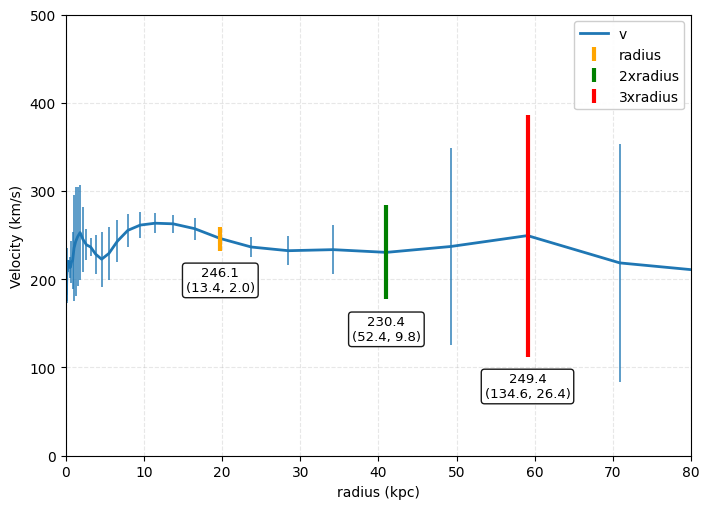

In [ ]:


# --- config ---

R_lum = mw_luminous_radius         # kpc
x_left, x_right = 0, 80
y_bottom, y_top = 0, 500

# --- pick columns robustly ---
rcol = 'r' if 'r' in mw.columns else 'radius'
vcol = 'v' if 'v' in mw.columns else 'velocity'
dvcol = 'dv'
errtot_col = 'err_tot' if 'err_tot' in mw.columns else ('err' if 'err' in mw.columns else None)
err_plain_col = 'err' if 'err' in m31.columns else None
if errtot_col is None or dvcol not in m31.columns:
    raise ValueError("Need 'dv' and either 'err_tot' or 'err' in the dataframe.")

# sort & window to the plotting range
df = m31[[rcol, vcol, dvcol, errtot_col] + ([err_plain_col] if err_plain_col else [])]\
       .dropna().sort_values(rcol).reset_index(drop=True)
dfw = df[(df[rcol] >= x_left) & (df[rcol] <= x_right)].copy()

# --- figure ---
plt.figure(figsize=(7.2, 5.2))
ax = plt.gca()

# Blue rotation-curve line (no markers)
ax.plot(df[rcol], df[vcol], color='C0', lw=2, label='v')

# Blue error bars (err_tot) for ALL points in window (no legend entry)
ax.errorbar(dfw[rcol], dfw[vcol], yerr=dfw[errtot_col],
            fmt='none', ecolor='C0', elinewidth=1.2, alpha=0.85)

# Special points for N=1,2,3 (error bars ONLY, colored; bold)
N_colors = {1: 'orange', 2: 'green', 3: 'red'}
labels    = {1: 'radius', 2: '2xradius', 3: '3xradius'}

for N in (1, 2, 3):
    target = N * R_lum
    # nearest point within the visible x-range
    idx = (dfw[rcol] - target).abs().idxmin()
    row = dfw.loc[idx]
    rN, vN = float(row[rcol]), float(row[vcol])
    dvN    = float(row[dvcol])
    eTotN  = float(row[errtot_col])
    ePlain = float(row[err_plain_col]) if err_plain_col else eTotN  # fallback

    # colored, thick error bar (no marker)
    ax.errorbar([rN], [vN], yerr=[eTotN],
                fmt='none', ecolor=N_colors[N], elinewidth=3.0, label=labels[N])

    # annotation UNDER the point: first line v; second line (dv, err)
    ax.text(rN, vN - eTotN - 18, f"{vN:.1f}\n({dvN:.1f}, {ePlain:.1f})",
            ha='center', va='top', fontsize=9.5,
            bbox=dict(boxstyle='round,pad=0.25', facecolor='white', alpha=0.9))

# Axes, legend, cosmetics
ax.set_xlim(x_left, x_right)
ax.set_ylim(y_bottom, y_top)
ax.set_xlabel('radius (kpc)')
ax.set_ylabel('Velocity (km/s)')
ax.grid(alpha=0.3, linestyle='--')

# Legend: only the four desired entries
handles, labels = ax.get_legend_handles_labels()
dedup = dict(zip(labels, handles))
ax.legend(dedup.values(), dedup.keys(), loc='upper right', framealpha=0.95)

plt.tight_layout()
plt.show()


In [ ]:
#delete all below

https://en.wikipedia.org/wiki/Milky_Way
    